In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# To overwrite the look of matplotlib with seaborn
sns.set()

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# Loading data - preprocessed for the PD model
loan_data = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Datasets\Credit Risk Analysis\Lending Club Data Kaggle\loan_data_2007_2014.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data.shape

(466285, 75)

In [4]:
# Creating a copy of the loan data
loan_data_copy = loan_data.copy()

In [5]:
# To show all columns & rows
pd.options.display.max_columns = None

loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### General Preprocessing

#### Preprocessing few continuous variables

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We need to remove 'years', '+', '>' and other text from this variable. We only need the numerical part of the data.

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(str(0))

In [10]:
loan_data['emp_length_int'].dtype

dtype('O')

In [11]:
#Converting to numerical
loan_data['emp_length_int'] = loan_data['emp_length_int'].astype(float)
loan_data['emp_length_int'].dtype

dtype('float64')

In [12]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
loan_data['term_int'] = loan_data['term'].str.lstrip()
loan_data['term_int'] = loan_data['term_int'].str.replace(' months', '')
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [14]:
#Converting to numerical
loan_data['term_int'] = loan_data['term_int'].astype(float)
loan_data['term_int'].dtype

dtype('float64')

In [15]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

We see that earliest_cr_line and issue_d are in text format. We need to convert them to months from the current date.

In [16]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
loan_data['months_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M'))

In [19]:
loan_data['months_since_earliest_cr_line']

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: months_since_earliest_cr_line, Length: 466285, dtype: float64

In [20]:
loan_data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

We observe that some data points have negative values for months since earliest credit line. This may have happened when we converted the data points to the datetime format. Let us check what these data points are.

In [21]:
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][loan_data['months_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


The negative data points refer to periods before 1960. We can preprocess these data points correctly. But that will be very time consuming. These data points confer to just 0.25% of our data. Alternatively, we can fix the months_since_earliest_cr_line value to the maximum value, as it would be closest to these points.

In [22]:
loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line'] < 0] = loan_data['months_since_earliest_cr_line'].max()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
min(loan_data['months_since_earliest_cr_line'])

73.0

In [24]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [25]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
loan_data['months_issue_d_date'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/np.timedelta64(1, 'M'))
loan_data['months_issue_d_date']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
          ... 
466280    47.0
466281    47.0
466282    47.0
466283    47.0
466284    47.0
Name: months_issue_d_date, Length: 466285, dtype: float64

In [27]:
loan_data['months_issue_d_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_issue_d_date, dtype: float64

#### Preprocessing Discrete Features

In [28]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [29]:
# Creating dummies for the categorical variables

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                    pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                    pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                    pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]


loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_issue_d_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36.0,1985-01-01,395.0,2011-12-01,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Sourc

### Missing Values Imputation

In [30]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [31]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [32]:
loan_data['annual_inc'].fillna(np.mean(loan_data['annual_inc']), inplace = True)
loan_data['annual_inc'].isnull().sum()

0

In [33]:
loan_data['delinq_2yrs'].fillna( 0 , inplace = True)
loan_data['inq_last_6mths'].fillna( 0 , inplace = True)
loan_data['open_acc'].fillna( 0 , inplace = True)
loan_data['pub_rec'].fillna( 0 , inplace = True)
loan_data['total_acc'].fillna( 0 , inplace = True)
loan_data['acc_now_delinq'].fillna( 0 , inplace = True)
loan_data['emp_length_int'].fillna( 0 , inplace = True)
loan_data['months_since_earliest_cr_line'].fillna( 0 , inplace = True)

### Data Preparation

### Dependent Variable

In [34]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [35]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [36]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [37]:
# Creating a binary variable for loan status
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off ', 'Late (31-120 days)',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)', 'Default']), 0, 1)

In [38]:
loan_data['good_bad'].head()

0    1
1    1
2    1
3    1
4    1
Name: good_bad, dtype: int32

In [39]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_issue_d_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,10.0,36.0,1985-01-01,395.0,2011-12-01,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT

In [40]:
df_inputs_prepr = loan_data.drop('good_bad', axis = 1)
df_targets_prepr = loan_data['good_bad']

In [41]:
df_inputs_prepr_final = pd.DataFrame()

In [42]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # Subsetting the rows
    df = df.iloc[:, [0,1,3]]
    # Renaming the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Calculating proportion of good obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculating number of good obs
    df['n_good'] = df['prop_good'] * df['n_obs']
    # Calculating number of bad obs
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [43]:
def plot_by_woe(df_WOE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WOE.iloc[:, 0])
    y = df_WOE['WOE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WOE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WOE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Creating Dummy Variables for Discrete Variables

In [44]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,OTHER,182,0.939560,0.000390,171.0,11.0,0.000374,0.001295,-1.243404,NaN,NaN,inf
1,RENT,188473,0.979514,0.404201,184612.0,3861.0,0.403266,0.454610,-0.119843,0.039954,1.123562,inf
2,NONE,50,0.980000,0.000107,49.0,1.0,0.000107,0.000118,-0.095352,0.000486,0.024490,inf
3,OWN,41704,0.981321,0.089439,40925.0,779.0,0.089396,0.091723,-0.025687,0.001321,0.069665,inf
4,MORTGAGE,235875,0.983716,0.505860,232034.0,3841.0,0.506855,0.452255,0.113979,0.002395,0.139666,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.016284,inf,inf


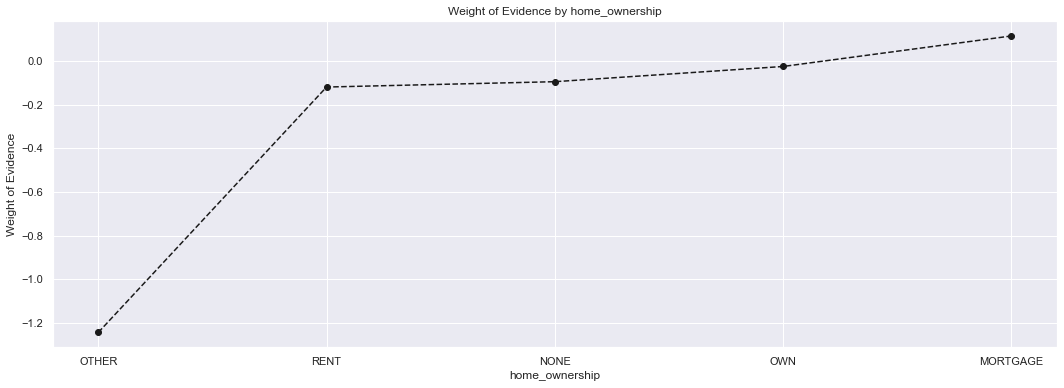

In [45]:
plot_by_woe(df_temp)

The categories Other and None are associated with a very low weight of evidence. Also we see that 'ANY' should be an error as it just has one record. We can remove these observations, but we dont want to lose on these data points. Hence, we combine Other, None & Any category with the next most riskiest category 'RENT'.

In [46]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])


df_inputs_prepr['home_ownership:MORTGAGE'] = df_inputs_prepr['home_ownership:MORTGAGE']

In [47]:
# State of the borrower
df_inputs_prepr['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [48]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,NE,14,0.714286,0.000030,10.0,4.0,0.000022,0.000471,-3.070882,NaN,NaN,inf
1,IA,14,0.857143,0.000030,12.0,2.0,0.000026,0.000235,-2.195413,0.142857,0.875469,inf
2,MT,1396,0.971347,0.002994,1356.0,40.0,0.002962,0.004710,-0.463758,0.114204,1.731656,inf
3,MS,1226,0.975530,0.002629,1196.0,30.0,0.002613,0.003532,-0.301632,0.004183,0.162126,inf
4,TN,5984,0.976437,0.012833,5843.0,141.0,0.012763,0.016602,-0.262933,0.000907,0.038699,inf
5,NV,6519,0.976530,0.013981,6366.0,153.0,0.013906,0.018015,-0.258884,0.000093,0.004049,inf
6,HI,2487,0.977081,0.005334,2430.0,57.0,0.005308,0.006711,-0.234577,0.000551,0.024307,inf
7,SD,980,0.977551,0.002102,958.0,22.0,0.002093,0.002590,-0.213367,0.000470,0.021210,inf
8,RI,2050,0.978537,0.004396,2006.0,44.0,0.004382,0.005181,-0.167464,0.000986,0.045903,inf
9,OK,4117,0.978868,0.008829,4030.0,87.0,0.008803,0.010244,-0.151559,0.000332,0.015905,inf


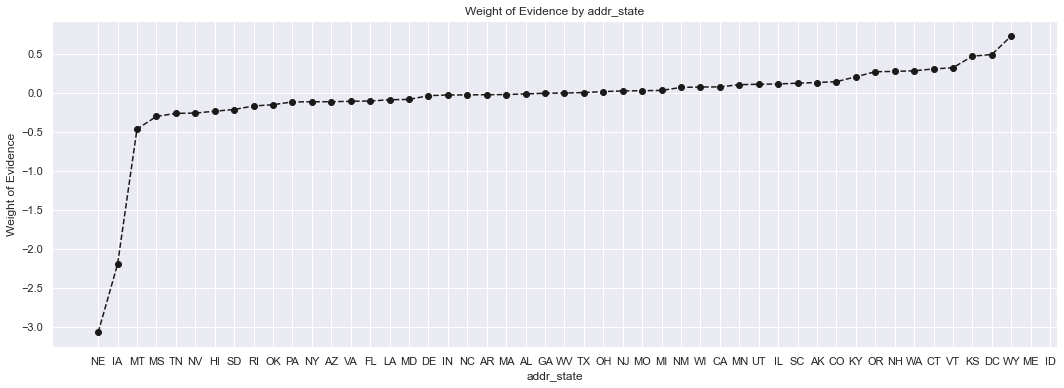

In [49]:
plot_by_woe(df_temp)

We see that there is no record for North Dakota. We might have customers from that state in future. Hence, we add a dummy variable with the values as 0.

In [50]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0  

We see that the states Nebraska and Iowa with a considerable lower weight of evidence than most states.
Also Maine and Idaho have a very high weight of evidence. The weight of evidence for these states could not be calculated as there were no bad borrowers in our data from these states.
Let us plot a woe chart without these to understand the others better.

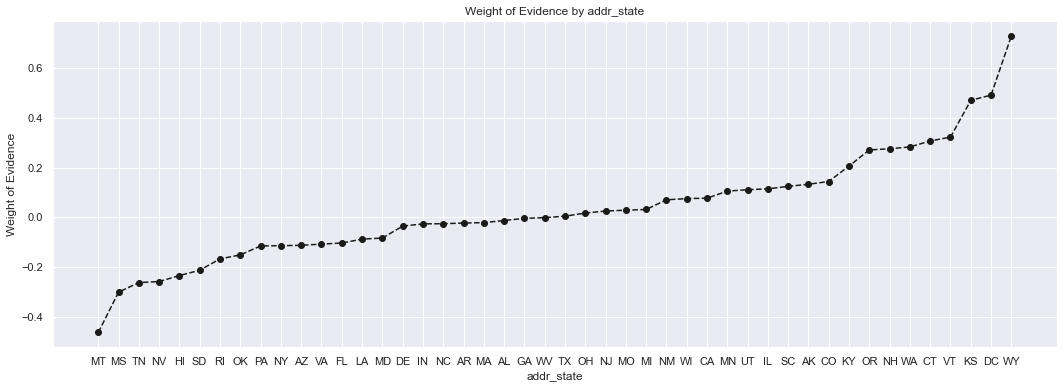

In [51]:
plot_by_woe(df_temp.iloc[2:-2, :])

We see a different perspective. As Nebraska & Iowa were so far away from the other observations, that the initial chart showed that all states have more or less similar weight of evidence. We now see that the first state MT has the lowest weight of evidence. The second, third and fourth states have considerably lower weight of evidence than the following states.

It makes sense to put MT as a separate category and SD, OK, MS as a separate category. However we see that MT does has a only 1125 borrowers. So we combine all these states with reference to OK with 3255 obervations. Further we will also add the NE & IA from the previous chart. 

We also include North Dakota (ND) here as we had no information about it. Since the category in question denotes highest risk category, we include ND here. This follows the conservation principle, that when we have no information, we assume the 'Worst' or highest risk category.

Similarly we combine AK, DC, KS, WY, ID & ME into one category with reference as KS with 3341 observations.

Let us now take a look at the remaining 38 states.

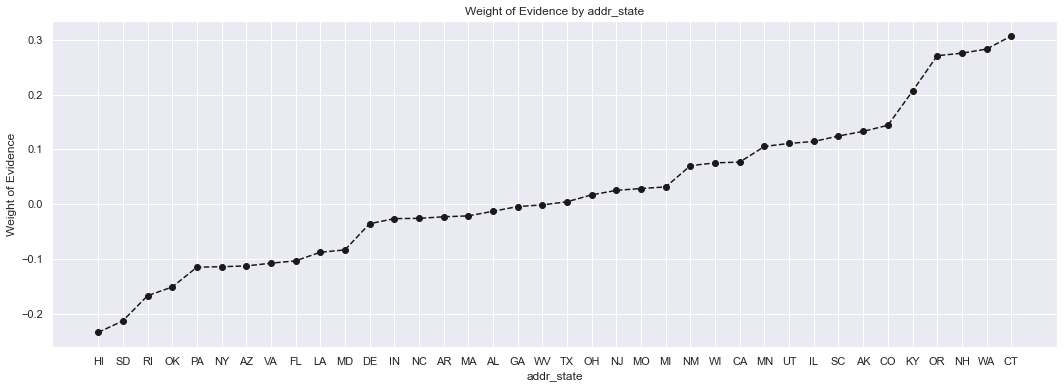

In [52]:
plot_by_woe(df_temp.iloc[6:-6,:])

We will further combine other states based on their similarity of weight of evidence and giving due consideration to the number of observations under each category.

In [53]:
df_inputs_prepr['addr_state:AK_DC_KS_WY_ID_ME'] = sum([df_inputs_prepr['addr_state:AK'],
                                                       df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:KS'],
                                                       df_inputs_prepr['addr_state:WY'],
                                                       df_inputs_prepr['addr_state:ID'],
                                                       df_inputs_prepr['addr_state:ME']])

df_inputs_prepr['addr_state:SD_OK_MS_MT_NE_IA_ND'] = sum([df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:OK'],
                                                       df_inputs_prepr['addr_state:MS'],
                                                       df_inputs_prepr['addr_state:MT'],
                                                       df_inputs_prepr['addr_state:NE'],
                                                       df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:ND']])

df_inputs_prepr['addr_state:TN_HI_NV'] = sum([df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:HI'],
                                              df_inputs_prepr['addr_state:NV']])

df_inputs_prepr['addr_state:AZ_RI_NY'] = sum([df_inputs_prepr['addr_state:AZ'],
                                              df_inputs_prepr['addr_state:RI'],
                                              df_inputs_prepr['addr_state:NY']])

df_inputs_prepr['addr_state:VA_LA'] = sum([df_inputs_prepr['addr_state:VA'],
                                           df_inputs_prepr['addr_state:LA']])

df_inputs_prepr['addr_state:MD_AL_IN_MO'] = sum([df_inputs_prepr['addr_state:MD'],
                                                 df_inputs_prepr['addr_state:AL'],
                                                 df_inputs_prepr['addr_state:IN'],
                                                 df_inputs_prepr['addr_state:MO']])

df_inputs_prepr['addr_state:MA_AR'] = sum([df_inputs_prepr['addr_state:MA'],
                                           df_inputs_prepr['addr_state:AR']])

df_inputs_prepr['addr_state:MI_DE_WI'] = sum([df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:DE'],
                                              df_inputs_prepr['addr_state:WI']])

df_inputs_prepr['addr_state:NC_NM'] = sum([df_inputs_prepr['addr_state:NC'],
                                           df_inputs_prepr['addr_state:NM']])

df_inputs_prepr['addr_state:CO_MN_NH_KY_VT'] = sum([df_inputs_prepr['addr_state:CO'],
                                                    df_inputs_prepr['addr_state:MN'],
                                                    df_inputs_prepr['addr_state:NH'],
                                                    df_inputs_prepr['addr_state:KY'],
                                                    df_inputs_prepr['addr_state:VT']])



df_inputs_prepr['addr_state:SC_WV_UT'] = sum([df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:WV'],
                                              df_inputs_prepr['addr_state:UT']])


In [54]:
#Verification Status
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [55]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,Source Verified,149993,0.979619,0.321677,146936.0,3057.0,0.320967,0.359943,-0.114610,NaN,NaN,0.011534
1,Verified,168055,0.981470,0.360413,164941.0,3114.0,0.360297,0.366655,-0.017493,0.001851,0.097117,0.011534
2,Not Verified,148237,0.984336,0.317911,145915.0,2322.0,0.318736,0.273402,0.153423,0.002866,0.170916,0.011534


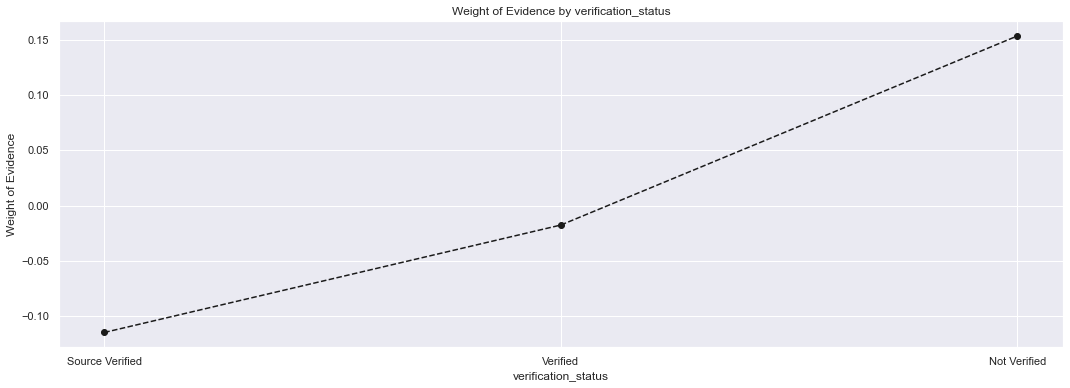

In [56]:
plot_by_woe(df_temp)

In [57]:
#Purpose
df_inputs_prepr['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [58]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,educational,422,0.924171,0.000905,390.0,32.0,0.000852,0.003768,-1.486762,NaN,NaN,0.023885
1,small_business,7013,0.972765,0.015040,6822.0,191.0,0.014902,0.022489,-0.411538,0.048594,1.075224,0.023885
2,house,2269,0.977523,0.004866,2218.0,51.0,0.004845,0.006005,-0.214637,0.004758,0.196901,0.023885
3,moving,2994,0.978624,0.006421,2930.0,64.0,0.006400,0.007536,-0.163298,0.001101,0.051339,0.023885
4,other,23690,0.978978,0.050806,23192.0,498.0,0.050661,0.058637,-0.146210,0.000355,0.017088,0.023885
5,medical,4602,0.979791,0.009870,4509.0,93.0,0.009849,0.010950,-0.105941,0.000813,0.040269,0.023885
6,debt_consolidation,274195,0.980911,0.588042,268961.0,5234.0,0.587518,0.616272,-0.047782,0.001120,0.058159,0.023885
7,home_improvement,26537,0.981950,0.056912,26058.0,479.0,0.056921,0.056399,0.009207,0.001038,0.056989,0.023885
8,vacation,2487,0.983916,0.005334,2447.0,40.0,0.005345,0.004710,0.126566,0.001967,0.117359,0.023885
9,credit_card,104157,0.984629,0.223376,102556.0,1601.0,0.224023,0.188508,0.172608,0.000713,0.046042,0.023885


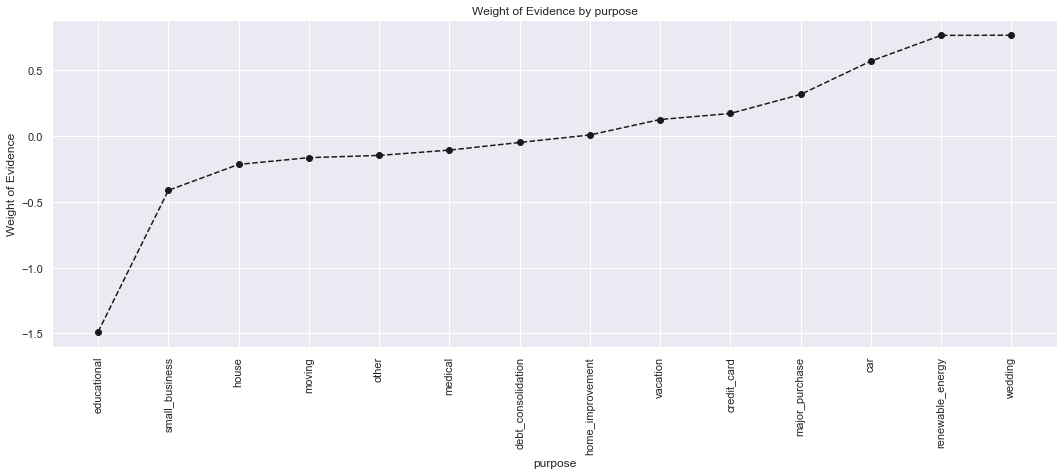

In [59]:
plot_by_woe(df_temp,90)

We see that educational purpose has the lowest weight of evidence, and renewable energy has the highest. But they also have the lowest number of observations among all the categories. Let us plot without these categories.

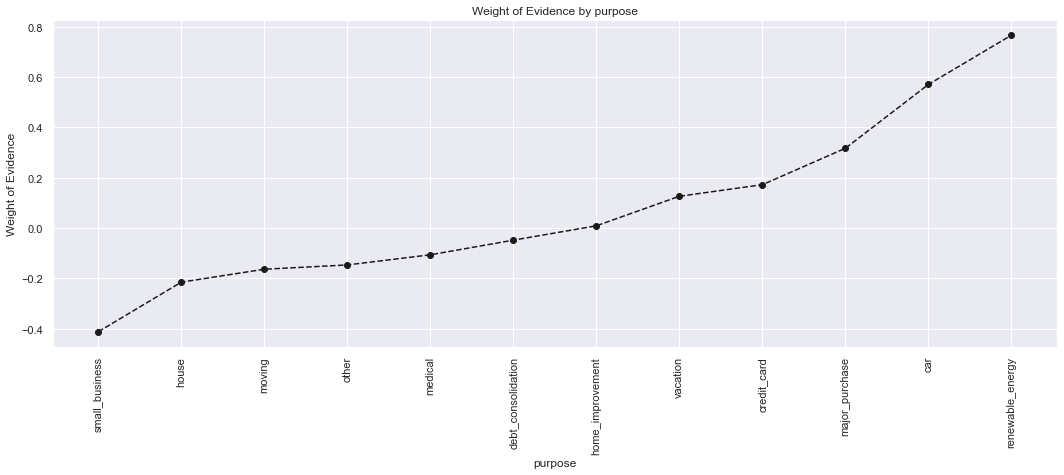

In [60]:
plot_by_woe(df_temp.iloc[1:-1,:],90)

We once again combine the categories based on their similarity of weight of evidence as well their numbers in our dataset.

In [61]:
df_inputs_prepr['purpose:house_moving'] = sum([df_inputs_prepr['purpose:house'],
                                               df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:other_medical'] = sum([df_inputs_prepr['purpose:other'],
                                                df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:vacation_major_purchase'] = sum([df_inputs_prepr['purpose:vacation'],
                                                          df_inputs_prepr['purpose:major_purchase']])

df_inputs_prepr['purpose:wedding_renewable_energy'] = sum([df_inputs_prepr['purpose:wedding'],
                                                           df_inputs_prepr['purpose:renewable_energy']])

In [62]:
# Initial List Status
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [63]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,w,163280,0.979348,0.350172,159908.0,3372.0,0.349303,0.397033,-0.128080,NaN,NaN,0.009749
1,f,303005,0.983099,0.649828,297884.0,5121.0,0.650697,0.602967,0.076182,0.003751,0.204262,0.009749


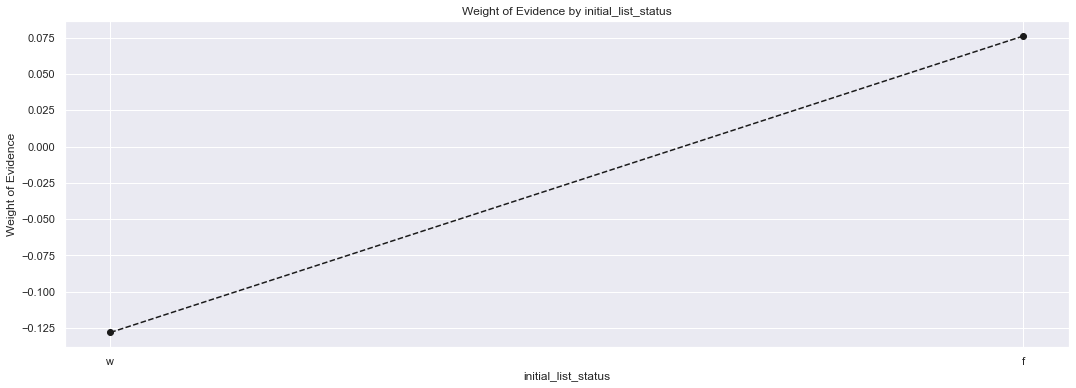

In [64]:
plot_by_woe(df_temp)

In [65]:
# Sub grade
df_inputs_prepr['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [66]:
df_temp = woe_discrete(df_inputs_prepr, 'sub_grade', df_targets_prepr)
df_temp

,sub_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G5,385,0.914286,0.000826,352.0,33.0,0.000769,0.003886,-1.620049,NaN,NaN,0.365131
1,G4,422,0.919431,0.000905,388.0,34.0,0.000848,0.004003,-1.552528,0.005146,0.067521,0.365131
2,G3,583,0.933105,0.001250,544.0,39.0,0.001188,0.004592,-1.351785,0.013673,0.200743,0.365131
3,G1,1109,0.952209,0.002378,1056.0,53.0,0.002307,0.006240,-0.995221,0.019105,0.356564,0.365131
4,G2,823,0.953827,0.001765,785.0,38.0,0.001715,0.004474,-0.959075,0.001618,0.036146,0.365131
5,F5,1513,0.959022,0.003245,1451.0,62.0,0.003170,0.007300,-0.834299,0.005194,0.124776,0.365131
6,F3,2708,0.960857,0.005808,2602.0,106.0,0.005684,0.012481,-0.786576,0.001835,0.047723,0.365131
7,F1,3940,0.961675,0.008450,3789.0,151.0,0.008277,0.017779,-0.764595,0.000818,0.021981,0.365131
8,F2,3001,0.962679,0.006436,2889.0,112.0,0.006311,0.013187,-0.737006,0.001004,0.027589,0.365131
9,E2,8669,0.962972,0.018592,8348.0,321.0,0.018235,0.037796,-0.728836,0.000292,0.008169,0.365131


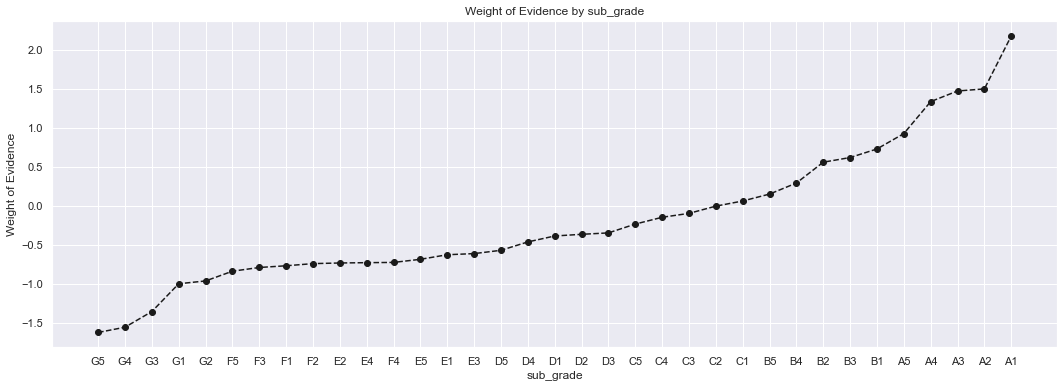

In [67]:
plot_by_woe(df_temp)

In [68]:
df_inputs_prepr['sub_grade:G5_G3_G4'] = sum([df_inputs_prepr['sub_grade:G5'],
                                             df_inputs_prepr['sub_grade:G3'],
                                             df_inputs_prepr['sub_grade:G4']])


df_inputs_prepr['sub_grade:G1_G2_F3_F5'] = sum([df_inputs_prepr['sub_grade:G1'],
                                                df_inputs_prepr['sub_grade:G2'],
                                                df_inputs_prepr['sub_grade:F3'],
                                                df_inputs_prepr['sub_grade:F5']])                                            
                                                             
df_inputs_prepr['sub_grade:E2_E4_F4_E5_F1_F2'] = sum([df_inputs_prepr['sub_grade:E2'],
                                                      df_inputs_prepr['sub_grade:E4'],
                                                      df_inputs_prepr['sub_grade:F4'],
                                                      df_inputs_prepr['sub_grade:E5'],
                                                      df_inputs_prepr['sub_grade:F1'],
                                                      df_inputs_prepr['sub_grade:F2']]) 


## Preprocessing Continuous Variables

In [69]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # Subsetting the rows
    df = df.iloc[:, [0,1,3]]
    # Renaming the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Calculating proportion of good obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculating number of good obs
    df['n_good'] = df['prop_good'] * df['n_obs']
    # Calculating number of bad obs
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WOE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [70]:
# Term
df_inputs_prepr['term_int'].unique()

array([36., 60.])

In [71]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,36.0,337953,0.984155,0.724778,332598.0,5355.0,0.726526,0.630519,0.141731,NaN,NaN,0.042495
1,60.0,128332,0.975548,0.275222,125194.0,3138.0,0.273474,0.369481,-0.300894,0.008607,0.442625,0.042495


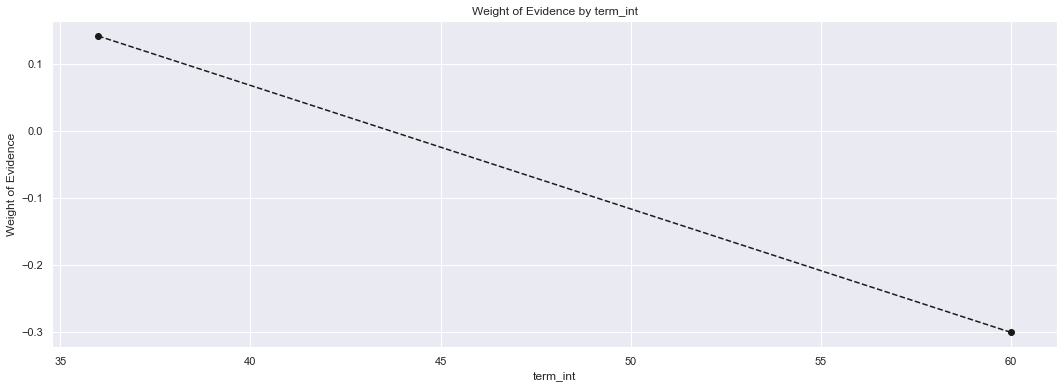

In [72]:
plot_by_woe(df_temp)

In [73]:
# Creating dummy variables
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36.0 ), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60.0 ), 1, 0)

In [74]:
# Employment Length
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [75]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,57273,0.979083,0.122828,56075.0,1198.0,0.122490,0.141057,-0.141136,NaN,NaN,0.005524
1,1.0,29622,0.980184,0.063528,29035.0,587.0,0.063424,0.069116,-0.085940,0.001101,0.055196,0.005524
2,2.0,41373,0.982090,0.088729,40632.0,741.0,0.088756,0.087248,0.017138,0.001906,0.103078,0.005524
3,3.0,36596,0.981610,0.078484,35923.0,673.0,0.078470,0.079242,-0.009785,0.000480,0.026923,0.005524
4,4.0,28023,0.982871,0.060098,27543.0,480.0,0.060165,0.056517,0.062545,0.001261,0.072330,0.005524
5,5.0,30774,0.983623,0.065998,30270.0,504.0,0.066122,0.059343,0.108163,0.000751,0.045619,0.005524
6,6.0,26112,0.981541,0.056000,25630.0,482.0,0.055986,0.056753,-0.013598,0.002081,0.121761,0.005524
7,7.0,26180,0.982811,0.056146,25730.0,450.0,0.056205,0.052985,0.058993,0.001270,0.072591,0.005524
8,8.0,22395,0.980799,0.048029,21965.0,430.0,0.047980,0.050630,-0.053752,0.002012,0.112745,0.005524
9,9.0,17888,0.980378,0.038363,17537.0,351.0,0.038308,0.041328,-0.075891,0.000421,0.022138,0.005524


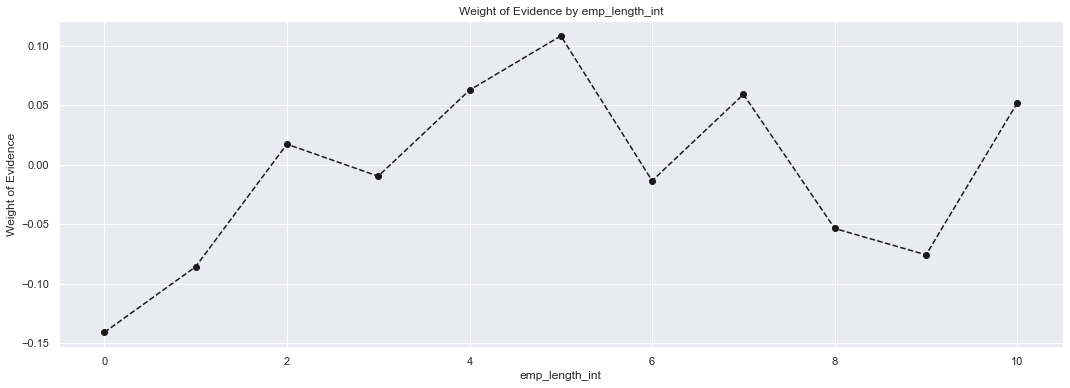

In [76]:
plot_by_woe(df_temp)

Here since all the classes have different weight of evidence, so we create dummy variables for all.

In [77]:
# Classing & creating dummy variables
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0.0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1.0]),1,0)
df_inputs_prepr['emp_length:2'] = np.where(df_inputs_prepr['emp_length_int'].isin([2.0]),1,0)
df_inputs_prepr['emp_length:3'] = np.where(df_inputs_prepr['emp_length_int'].isin([3.0]),1,0)
df_inputs_prepr['emp_length:4'] = np.where(df_inputs_prepr['emp_length_int'].isin([4.0]),1,0)
df_inputs_prepr['emp_length:5'] = np.where(df_inputs_prepr['emp_length_int'].isin([5.0]),1,0)
df_inputs_prepr['emp_length:6'] = np.where(df_inputs_prepr['emp_length_int'].isin([6.0]),1,0)
df_inputs_prepr['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7.0]),1,0)
df_inputs_prepr['emp_length:8'] = np.where(df_inputs_prepr['emp_length_int'].isin([8.0]),1,0)
df_inputs_prepr['emp_length:9'] = np.where(df_inputs_prepr['emp_length_int'].isin([9.0]),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10.0]),1,0)

In [78]:
df_inputs_prepr['months_issue_d_date'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

We will first fine class the values into categories. Next we will determine final categories by combining few of the initial fine class categories into bigger categories, if needed.

In [79]:
df_inputs_prepr['months_issue_d_date_factor'] = pd.cut(df_inputs_prepr['months_issue_d_date'], 50)

In [80]:
df_inputs_prepr['months_issue_d_date_factor']

0         (70.2, 72.0]
1         (70.2, 72.0]
2         (70.2, 72.0]
3         (70.2, 72.0]
4         (70.2, 72.0]
              ...     
466280    (46.8, 48.6]
466281    (46.8, 48.6]
466282    (46.8, 48.6]
466283    (46.8, 48.6]
466284    (46.8, 48.6]
Name: months_issue_d_date_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [81]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_issue_d_date_factor', df_targets_prepr)
df_temp

,months_issue_d_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(35.91, 37.8]",35361,0.975340,0.075836,34489.0,872.0,0.075338,0.102673,-0.309566,NaN,NaN,0.36589
1,"(37.8, 39.6]",49388,0.975277,0.105918,48167.0,1221.0,0.105216,0.143765,-0.312169,0.000063,0.002602,0.36589
2,"(39.6, 41.4]",48120,0.976455,0.103199,46987.0,1133.0,0.102638,0.133404,-0.262171,0.001177,0.049998,0.36589
3,"(41.4, 43.2]",36278,0.976956,0.077802,35442.0,836.0,0.077419,0.098434,-0.240148,0.000501,0.022022,0.36589
4,"(43.2, 45.0]",35584,0.977940,0.076314,34799.0,785.0,0.076015,0.092429,-0.195512,0.000984,0.044636,0.36589
5,"(45.0, 46.8]",15269,0.981400,0.032746,14985.0,284.0,0.032733,0.033439,-0.021342,0.003461,0.174171,0.36589
6,"(46.8, 48.6]",30648,0.980455,0.065728,30049.0,599.0,0.065639,0.070529,-0.071850,0.000945,0.050508,0.36589
7,"(48.6, 50.4]",28790,0.982563,0.061743,28288.0,502.0,0.061792,0.059108,0.044420,0.002108,0.116270,0.36589
8,"(50.4, 52.2]",25661,0.985971,0.055033,25301.0,360.0,0.055267,0.042388,0.265323,0.003408,0.220902,0.36589
9,"(52.2, 54.0]",22809,0.986716,0.048916,22506.0,303.0,0.049162,0.035676,0.320632,0.000745,0.055309,0.36589


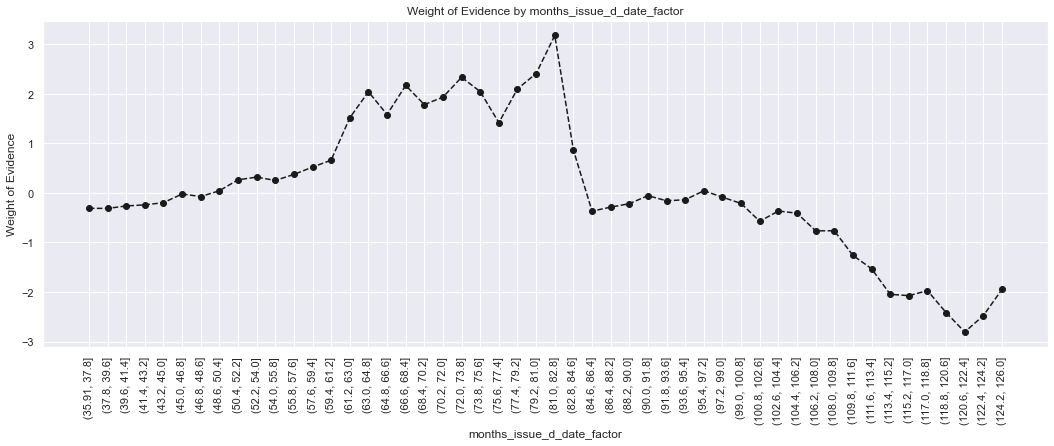

In [82]:
df_temp['months_issue_d_date_factor'] = df_temp['months_issue_d_date_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [83]:
df_inputs_prepr['months_issue_d_date:<49'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(49)),1,0)
df_inputs_prepr['months_issue_d_date:49-54'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(49,54)),1,0)
df_inputs_prepr['months_issue_d_date:55-61'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(54,61)),1,0)
df_inputs_prepr['months_issue_d_date:62-77'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(61,77)),1,0)
df_inputs_prepr['months_issue_d_date:>77'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(77, int(df_inputs_prepr['months_issue_d_date'].max()))),1,0)


In [84]:
# Exploring Interest Rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [85]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(5.399, 5.833]",983,1.000000,0.002108,983.0,0.0,0.002147,0.000000,inf,NaN,NaN,inf
1,"(5.833, 6.246]",10545,0.997819,0.022615,10522.0,23.0,0.022984,0.002708,2.138557,0.002181,inf,inf
2,"(6.246, 6.658]",9800,0.995816,0.021017,9759.0,41.0,0.021318,0.004828,1.485201,0.002003,0.653356,inf
3,"(6.658, 7.071]",2293,0.998256,0.004918,2289.0,4.0,0.005000,0.000471,2.362403,0.002439,0.877203,inf
4,"(7.071, 7.484]",3947,0.994933,0.008465,3927.0,20.0,0.008578,0.002355,1.292726,0.003323,1.069677,inf
5,"(7.484, 7.897]",15826,0.995135,0.033941,15749.0,77.0,0.034402,0.009066,1.333554,0.000202,0.040828,inf
6,"(7.897, 8.31]",12116,0.994553,0.025984,12050.0,66.0,0.026322,0.007771,1.219993,0.000582,0.113562,inf
7,"(8.31, 8.722]",8274,0.989364,0.017745,8186.0,88.0,0.017881,0.010361,0.545671,0.005188,0.674321,inf
8,"(8.722, 9.135]",11923,0.994129,0.025570,11853.0,70.0,0.025892,0.008242,1.144668,0.004765,0.598997,inf
9,"(9.135, 9.548]",8271,0.989119,0.017738,8181.0,90.0,0.017871,0.010597,0.522587,0.005010,0.622081,inf


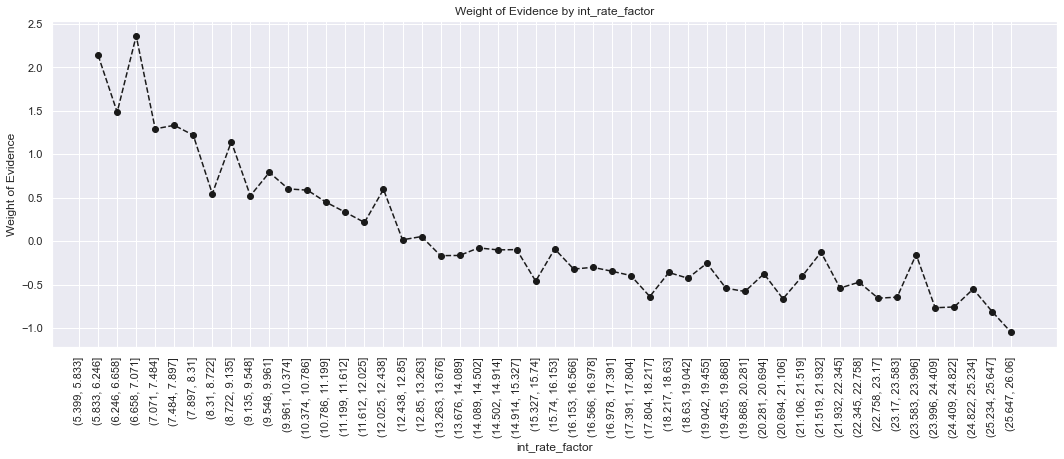

In [86]:
df_temp['int_rate_factor'] = df_temp['int_rate_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [87]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548 ) & (df_inputs_prepr['int_rate'] <= 12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74 )& (df_inputs_prepr['int_rate'] <= 20.281),1,0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281),1,0)

In [88]:
# Exploring funded amount
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)

In [89]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(465.5, 1190.0]",1543,0.980557,0.003309,1513.0,30.0,0.003305,0.003532,-0.066520,NaN,NaN,0.018575
1,"(1190.0, 1880.0]",3828,0.988767,0.008210,3785.0,43.0,0.008268,0.005063,0.490428,0.008210,0.556949,0.018575
2,"(1880.0, 2570.0]",7531,0.985394,0.016151,7421.0,110.0,0.016210,0.012952,0.224416,0.003373,0.266012,0.018575
3,"(2570.0, 3260.0]",9065,0.986652,0.019441,8944.0,121.0,0.019537,0.014247,0.315775,0.001258,0.091359,0.018575
4,"(3260.0, 3950.0]",5996,0.984990,0.012859,5906.0,90.0,0.012901,0.010597,0.196742,0.001662,0.119033,0.018575
5,"(3950.0, 4640.0]",11321,0.983835,0.024279,11138.0,183.0,0.024330,0.021547,0.121459,0.001155,0.075283,0.018575
6,"(4640.0, 5330.0]",19860,0.982779,0.042592,19518.0,342.0,0.042635,0.040268,0.057109,0.001056,0.064350,0.018575
7,"(5330.0, 6020.0]",21422,0.985482,0.045942,21111.0,311.0,0.046115,0.036618,0.230584,0.002703,0.173475,0.018575
8,"(6020.0, 6710.0]",8632,0.984361,0.018512,8497.0,135.0,0.018561,0.015895,0.155021,0.001122,0.075563,0.018575
9,"(6710.0, 7400.0]",14686,0.982160,0.031496,14424.0,262.0,0.031508,0.030849,0.021132,0.002201,0.133889,0.018575


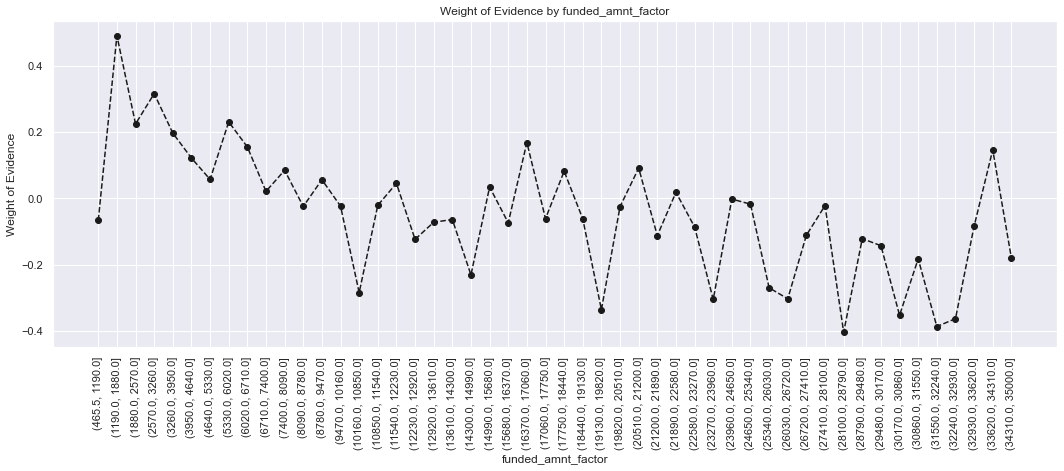

In [90]:
df_temp['funded_amnt_factor'] = df_temp['funded_amnt_factor'].astype(str)
plot_by_woe(df_temp, 90)

We see that there seems to be no association between 'funded amount' and WOE. Hence we will not use this variable in the PD model.

In [91]:
# Exploring months since earliest credit line
df_inputs_prepr['months_since_earliest_cr_line'].unique()

array([395., 224., 193., 262., 263., 157., 149., 131., 164., 159., 239.,
       338., 173., 319., 123., 230., 292., 170., 203., 241., 418., 389.,
       176., 198., 190., 400., 133., 360., 433., 250., 152., 122., 204.,
       128., 192., 179., 285., 231., 162., 265., 221., 270., 303., 191.,
       308., 134., 211., 228., 156., 206., 187., 139., 185., 137., 247.,
       146., 272., 182., 215., 212., 276., 147., 396., 216., 169., 342.,
       174., 254., 175., 186., 126., 252., 406., 183., 383., 235., 251.,
       150., 334., 165., 269., 280., 306., 249., 140., 332., 220., 207.,
       202., 348., 226., 312., 208., 158., 160., 154., 145., 205., 127.,
       323., 210., 136., 180., 294., 138., 166., 324., 213., 274., 197.,
       188., 135., 223., 232., 144., 163., 194., 414., 381., 452., 161.,
       113., 259., 167., 181., 184., 196., 321., 339., 279., 171., 219.,
       148., 372., 229., 142., 283., 121., 298., 313., 151., 528., 199.,
       333., 261., 458., 438., 201., 200., 222., 28

In [92]:
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)

In [93]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.587, 11.74]",29,0.896552,0.000062,26.0,3.0,0.000057,0.000353,-1.827688,NaN,NaN,0.01825
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01825
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01825
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01825
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01825
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01825
6,"(70.44, 82.18]",904,0.969027,0.001939,876.0,28.0,0.001914,0.003297,-0.544011,NaN,NaN,0.01825
7,"(82.18, 93.92]",2437,0.975790,0.005226,2378.0,59.0,0.005194,0.006947,-0.290695,0.006763,0.253316,0.01825
8,"(93.92, 105.66]",3532,0.970838,0.007575,3429.0,103.0,0.007490,0.012128,-0.481878,0.004952,0.191183,0.01825
9,"(105.66, 117.4]",6360,0.975314,0.013640,6203.0,157.0,0.013550,0.018486,-0.310630,0.004476,0.171248,0.01825


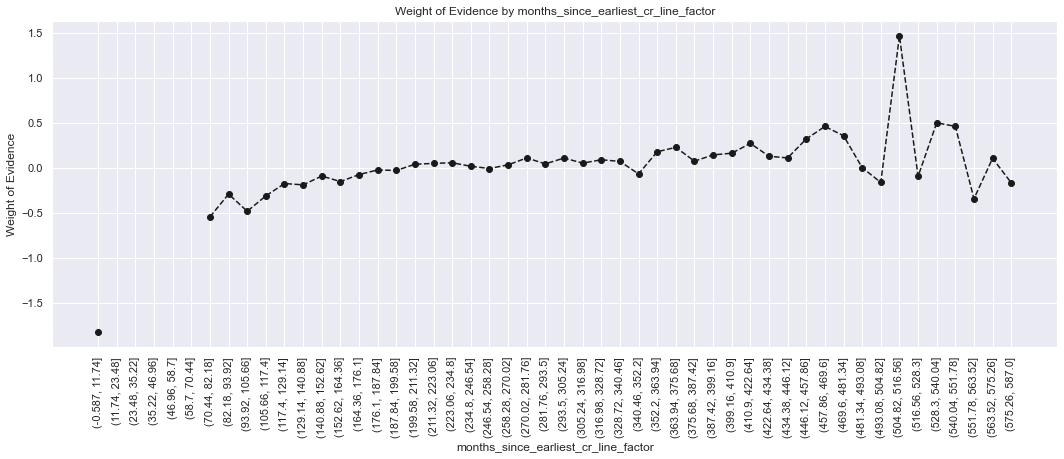

In [94]:
df_temp['months_since_earliest_cr_line_factor'] = df_temp['months_since_earliest_cr_line_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [95]:
df_inputs_prepr['months_since_earliest_cr_line:<153'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(153)),1,0)
df_inputs_prepr['months_since_earliest_cr_line:154-258'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(153,258)),1,0)
df_inputs_prepr['months_since_earliest_cr_line:<258-387'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(258,387)),1,0)
df_inputs_prepr['months_since_earliest_cr_line:<387'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(258,int(df_inputs_prepr['months_since_earliest_cr_line'].max()))),1,0)                                                                  

In [96]:
# Exploring Installment 
df_inputs_prepr['installment'].unique()

array([162.87,  59.83,  84.33, ..., 971.51, 372.77, 217.65])

In [97]:
len(df_inputs_prepr['installment'].unique())

55622

In [98]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)

In [99]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(14.276, 43.556]",2297,0.984763,0.004926,2262.0,35.0,0.004941,0.004121,0.181484,NaN,NaN,0.024312
1,"(43.556, 71.443]",6090,0.987521,0.013061,6014.0,76.0,0.013137,0.008949,0.383939,0.002758,0.202455,0.024312
2,"(71.443, 99.329]",8554,0.987374,0.018345,8446.0,108.0,0.018449,0.012716,0.372144,0.000146,0.011795,0.024312
3,"(99.329, 127.216]",11440,0.985140,0.024534,11270.0,170.0,0.024618,0.020016,0.206929,0.002234,0.165216,0.024312
4,"(127.216, 155.102]",12648,0.985373,0.027125,12463.0,185.0,0.027224,0.021783,0.222991,0.000233,0.016063,0.024312
5,"(155.102, 182.988]",20953,0.982771,0.044936,20592.0,361.0,0.044981,0.042506,0.056607,0.002602,0.166384,0.024312
6,"(182.988, 210.875]",21342,0.985756,0.045770,21038.0,304.0,0.045955,0.035794,0.249885,0.002985,0.193278,0.024312
7,"(210.875, 238.761]",18804,0.985163,0.040327,18525.0,279.0,0.040466,0.032851,0.208492,0.000593,0.041393,0.024312
8,"(238.761, 266.648]",23532,0.981132,0.050467,23088.0,444.0,0.050433,0.052278,-0.035929,0.004031,0.244421,0.024312
9,"(266.648, 294.534]",25075,0.980259,0.053776,24580.0,495.0,0.053693,0.058283,-0.082042,0.000873,0.046113,0.024312


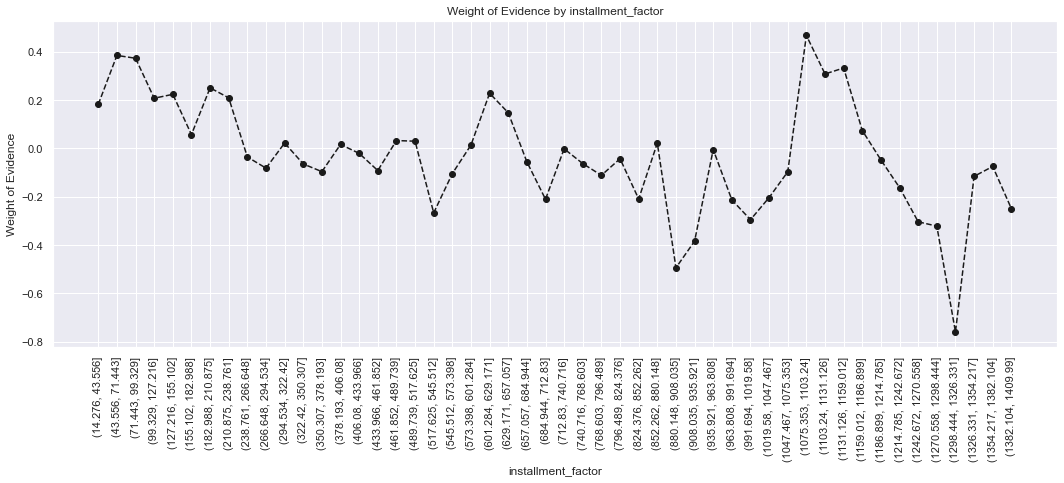

In [100]:
df_temp['installment_factor'] = df_temp['installment_factor'].astype(str)
plot_by_woe(df_temp, 90)

We see that there seems to be no association between 'installment' and WOE. Hence we will not use this variable in the PD model.

In [101]:
# Exploring delinq_2yrs
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 12., 17., 18., 29., 24., 14., 21., 22., 19., 16.])

In [102]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,382983,0.982595,0.821350,376317.0,6666.0,0.822026,0.784882,0.046239,NaN,NaN,inf
1,1.0,56224,0.979439,0.120579,55068.0,1156.0,0.120290,0.136112,-0.123570,0.003155,0.169809,inf
2,2.0,16310,0.975598,0.034979,15912.0,398.0,0.034758,0.046862,-0.298796,0.003842,0.175226,inf
3,3.0,5684,0.974138,0.012190,5537.0,147.0,0.012095,0.017308,-0.358397,0.001460,0.059601,inf
4,4.0,2378,0.978553,0.005100,2327.0,51.0,0.005083,0.006005,-0.166663,0.004415,0.191734,inf
5,5.0,1236,0.980583,0.002651,1212.0,24.0,0.002647,0.002826,-0.065199,0.002029,0.101464,inf
6,6.0,629,0.968203,0.001349,609.0,20.0,0.001330,0.002355,-0.571087,0.012379,0.505887,inf
7,7.0,346,0.971098,0.000742,336.0,10.0,0.000734,0.001177,-0.472647,0.002895,0.098440,inf
8,8.0,177,0.960452,0.000380,170.0,7.0,0.000371,0.000824,-0.797284,0.010646,0.324638,inf
9,9.0,111,0.963964,0.000238,107.0,4.0,0.000234,0.000471,-0.700638,0.003512,0.096646,inf


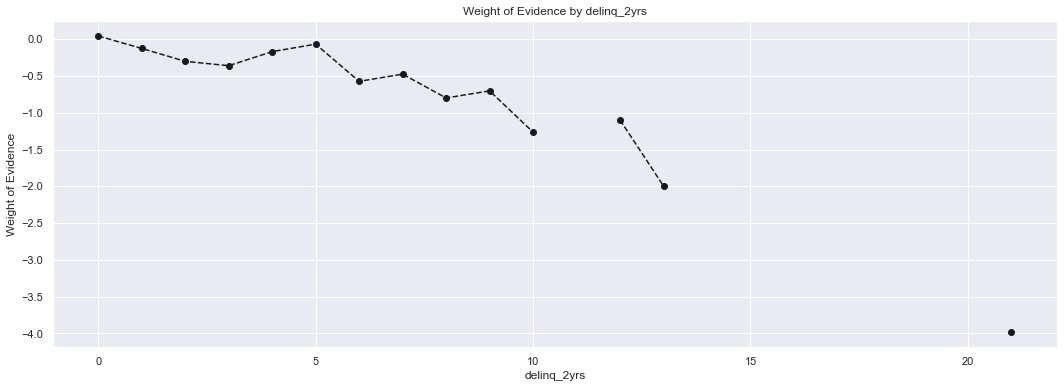

In [103]:
plot_by_woe(df_temp)

In [104]:
df_inputs_prepr['delinq_2yrs:<5'] = np.where((df_inputs_prepr['delinq_2yrs'] <= 5.0),1,0)
df_inputs_prepr['delinq_2yrs:5-10'] = np.where((df_inputs_prepr['delinq_2yrs'] > 5.0) & (df_inputs_prepr['delinq_2yrs'] < 10.0),1,0)
df_inputs_prepr['delinq_2yrs:>10'] = np.where((df_inputs_prepr['delinq_2yrs'] > 10.0),1,0)

In [105]:
# Exploring inq_last_6mths
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

In [106]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,241527,0.984449,0.517981,237771.0,3756.0,0.519387,0.442247,0.160781,NaN,NaN,inf
1,1.0,130148,0.981790,0.279117,127778.0,2370.0,0.279118,0.279053,0.000232,0.002659,0.160549,inf
2,2.0,57825,0.981236,0.124012,56740.0,1085.0,0.123943,0.127752,-0.030273,0.000553,0.030505,inf
3,3.0,25126,0.980339,0.053885,24632.0,494.0,0.053806,0.058166,-0.077906,0.000897,0.047633,inf
4,4.0,7241,0.954702,0.015529,6913.0,328.0,0.015101,0.038620,-0.939027,0.025637,0.861121,inf
5,5.0,2768,0.930275,0.005936,2575.0,193.0,0.005625,0.022725,-1.396258,0.024428,0.457231,inf
6,6.0,1188,0.898990,0.002548,1068.0,120.0,0.002333,0.014129,-1.801121,0.031285,0.404863,inf
7,7.0,195,0.712821,0.000418,139.0,56.0,0.000304,0.006594,-3.078050,0.186169,1.276929,inf
8,8.0,122,0.655738,0.000262,80.0,42.0,0.000175,0.004945,-3.342816,0.057083,0.264765,inf
9,9.0,50,0.640000,0.000107,32.0,18.0,0.000070,0.002119,-3.411808,0.015738,0.068993,inf


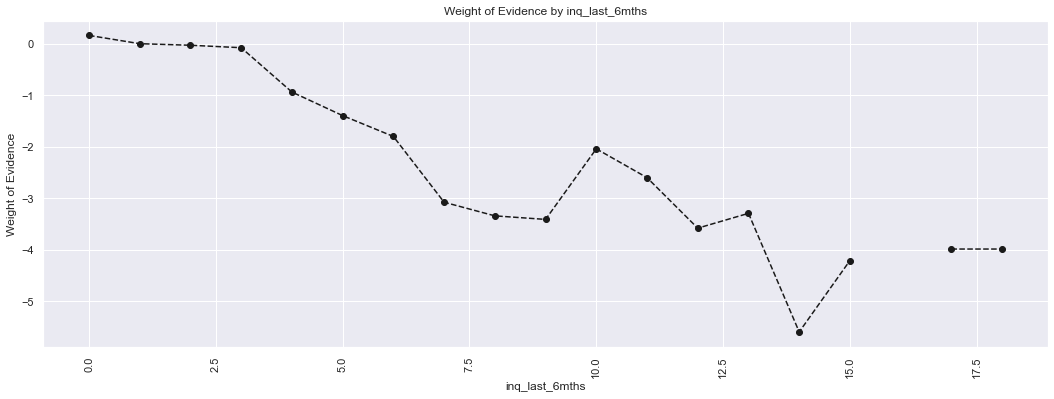

In [107]:
plot_by_woe(df_temp, 90)

In [108]:
df_inputs_prepr['inq_last_6mths:<4'] = np.where((df_inputs_prepr['inq_last_6mths'] <= 4.0),1,0)
df_inputs_prepr['inq_last_6mths:4-6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 4.0) & (df_inputs_prepr['inq_last_6mths'] < 6.0),1,0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6.0),1,0)

In [109]:
# Exploring open_acc
df_inputs_prepr['open_acc'].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47.,  0., 40., 45., 49., 53., 51., 43., 62.,
       48., 50., 52., 54., 76., 58., 55., 84., 75., 61.])

In [110]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,36,0.888889,0.000077,32.0,4.0,0.000070,0.000471,-1.907731,NaN,NaN,inf
1,1.0,142,0.922535,0.000305,131.0,11.0,0.000286,0.001295,-1.509871,0.033646,0.397861,inf
2,2.0,1790,0.978771,0.003839,1752.0,38.0,0.003827,0.004474,-0.156246,0.056236,1.353625,inf
3,3.0,5500,0.982364,0.011795,5403.0,97.0,0.011802,0.011421,0.032826,0.003593,0.189072,inf
4,4.0,12588,0.986733,0.026996,12421.0,167.0,0.027132,0.019663,0.321977,0.004370,0.289151,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
57,61.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
58,62.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
59,75.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
60,76.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000118,-3.987173,0.500000,inf,inf


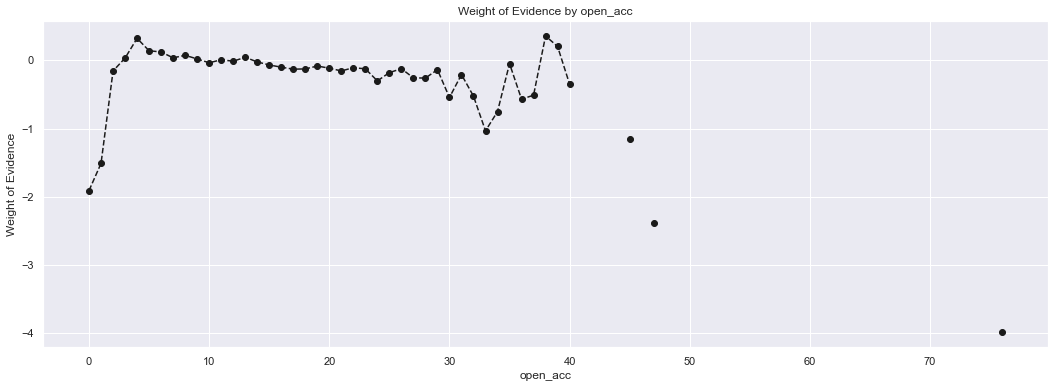

In [111]:
plot_by_woe(df_temp)

We see that except the '0' value for the open acc, we cannot see any significant relationship between woe and open acc. Moreover, we have only 30 observations for the '0' value. Hence, we will omit this variable from our PD model.

In [112]:
# Exploring pub_rec
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 11., 49., 10.,
       54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34., 17.])

In [113]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,404922,0.982313,0.868400,397760.0,7162.0,0.868866,0.843283,0.029887,NaN,NaN,inf
1,1.0,53051,0.978247,0.113774,51897.0,1154.0,0.113364,0.135877,-0.181146,0.004065,0.211033,inf
2,2.0,5624,0.978485,0.012061,5503.0,121.0,0.012021,0.014247,-0.169915,0.000238,0.011231,inf
3,3.0,1611,0.975171,0.003455,1571.0,40.0,0.003432,0.004710,-0.316584,0.003314,0.146670,inf
4,4.0,520,0.984615,0.001115,512.0,8.0,0.001118,0.000942,0.171710,0.009445,0.488295,inf
5,5.0,276,0.985507,0.000592,272.0,4.0,0.000594,0.000471,0.232335,0.000892,0.060625,inf
6,6.0,136,0.985294,0.000292,134.0,2.0,0.000293,0.000235,0.217520,0.000213,0.014815,inf
7,7.0,62,1.000000,0.000133,62.0,0.0,0.000135,0.000000,inf,0.014706,inf,inf
8,8.0,29,0.965517,0.000062,28.0,1.0,0.000061,0.000118,-0.654968,0.034483,inf,inf
9,9.0,16,0.937500,0.000034,15.0,1.0,0.000033,0.000118,-1.279122,0.028017,0.624154,inf


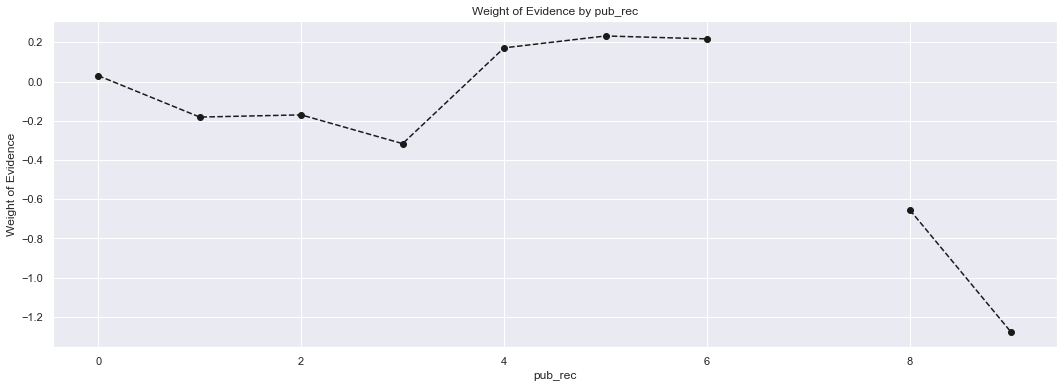

In [114]:
plot_by_woe(df_temp)

We observe no significant relationship between WOE and pub_rec. Hence, we omit this variable from our PD model.

In [115]:
#Exploring total_acc
df_inputs_prepr['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1.,   0., 105.,  83.,  84.,  98.,
        88.,  82.,  91.,  99.,  86.,  93.,  92.,  96., 101., 150.,  95.,
        85., 156.,  89., 106.,  97., 119., 124., 100.,  94., 121., 102.,
       117., 116., 118.])

In [116]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,29,0.896552,0.000062,26.0,3.0,0.000057,0.000353,-1.827688,NaN,NaN,inf
1,1.0,21,0.809524,0.000045,17.0,4.0,0.000037,0.000471,-2.540254,0.087028,0.712565,inf
2,2.0,62,0.806452,0.000133,50.0,12.0,0.000109,0.001413,-2.560056,0.003072,0.019803,inf
3,3.0,472,0.959746,0.001012,453.0,19.0,0.000990,0.002237,-0.815719,0.153294,1.744337,inf
4,4.0,1504,0.980053,0.003225,1474.0,30.0,0.003220,0.003532,-0.092635,0.020307,0.723085,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
108,119.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
109,121.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
110,124.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
111,150.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


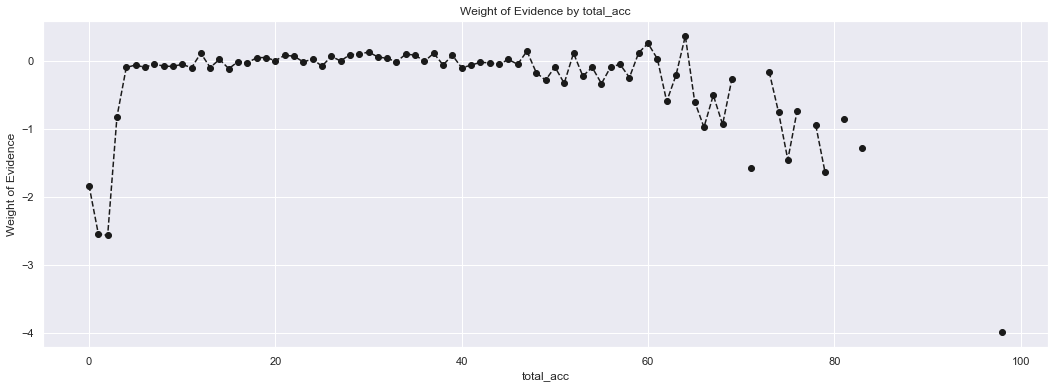

In [117]:
plot_by_woe(df_temp)

No significant relationship between WOE and total_acc can be observed. We omit this variable from our PD model.

In [118]:
# Exploring acc_now_delinq
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 5., 4.])

In [119]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,464553,0.981817,0.996286,456106.0,8447.0,0.996317,0.994584,0.001741,NaN,NaN,inf
1,1.0,1623,0.973506,0.003481,1580.0,43.0,0.003451,0.005063,-0.383193,0.008311,0.384934,inf
2,2.0,92,0.967391,0.000197,89.0,3.0,0.000194,0.000353,-0.597149,0.006115,0.213956,inf
3,3.0,11,1.000000,0.000024,11.0,0.0,0.000024,0.000000,inf,0.032609,inf,inf
4,4.0,4,1.000000,0.000009,4.0,0.0,0.000009,0.000000,inf,0.000000,NaN,inf
5,5.0,2,1.000000,0.000004,2.0,0.0,0.000004,0.000000,inf,0.000000,NaN,inf


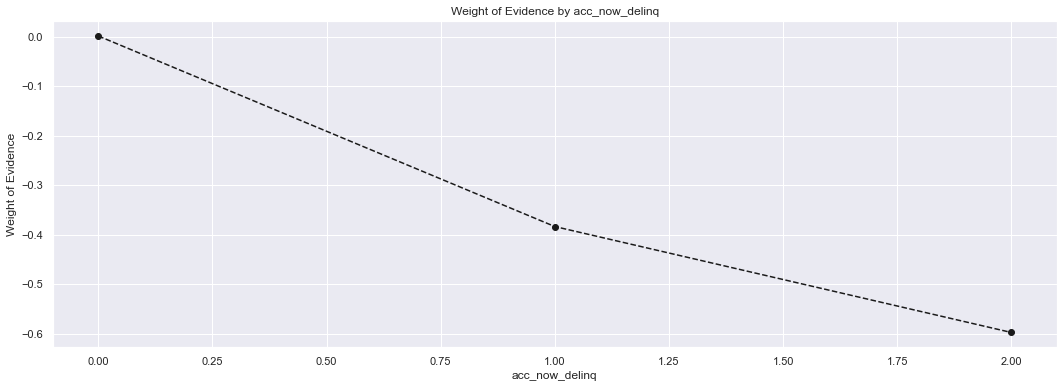

In [120]:
plot_by_woe(df_temp)

In [121]:
df_inputs_prepr['acc_now_delinq:<1'] = np.where((df_inputs_prepr['acc_now_delinq'] <= 1.00),1,0)
df_inputs_prepr['acc_now_delinq:>1'] = np.where((df_inputs_prepr['acc_now_delinq'] > 1.00),1,0)

In [122]:
# Exploring Annual Income
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-5602.104, 151858.08]",445843,0.981662,0.956160,437667.0,8176.0,0.956039,0.962675,-0.006917,NaN,NaN,inf
1,"(151858.08, 301820.16]",18425,0.984749,0.039514,18144.0,281.0,0.039634,0.033086,0.180568,0.003087,0.187485,inf
2,"(301820.16, 451782.24]",1368,0.980263,0.002934,1341.0,27.0,0.002929,0.003179,-0.081839,0.004486,0.262407,inf
3,"(451782.24, 601744.32]",372,0.991935,0.000798,369.0,3.0,0.000806,0.000353,0.825012,0.011672,0.906850,inf
4,"(601744.32, 751706.4]",115,0.965217,0.000247,111.0,4.0,0.000242,0.000471,-0.663937,0.026718,1.488949,inf
5,"(751706.4, 901668.48]",73,0.986301,0.000157,72.0,1.0,0.000157,0.000118,0.289493,0.021084,0.953430,inf
6,"(901668.48, 1051630.56]",33,1.000000,0.000071,33.0,0.0,0.000072,0.000000,inf,0.013699,inf,inf
7,"(1051630.56, 1201592.64]",21,1.000000,0.000045,21.0,0.0,0.000046,0.000000,inf,0.000000,NaN,inf
8,"(1201592.64, 1351554.72]",10,0.900000,0.000021,9.0,1.0,0.000020,0.000118,-1.789948,0.100000,inf,inf
9,"(1351554.72, 1501516.8]",6,1.000000,0.000013,6.0,0.0,0.000013,0.000000,inf,0.100000,inf,inf


We see that more than 95% of the observations fall within the first income range of -5602.104, 151858.08. Let us try fine classing the variable into 100 classes.

In [123]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-5602.104, 76877.04]",306443,0.980437,0.657201,300448.0,5995.0,0.656298,0.705875,-0.072824,NaN,NaN,inf
1,"(76877.04, 151858.08]",139400,0.984354,0.298959,137219.0,2181.0,0.299741,0.256800,0.154622,0.003918,0.227446,inf
2,"(151858.08, 226839.12]",14866,0.985067,0.031882,14644.0,222.0,0.031988,0.026139,0.201936,0.000712,0.047314,inf
3,"(226839.12, 301820.16]",3559,0.983422,0.007633,3500.0,59.0,0.007645,0.006947,0.095808,0.001644,0.106128,inf
4,"(301820.16, 376801.2]",867,0.976932,0.001859,847.0,20.0,0.001850,0.002355,-0.241204,0.006490,0.337012,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(7125094.8, 7200075.84]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,NaN,inf
96,"(7200075.84, 7275056.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7275056.88, 7350037.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7350037.92, 7425018.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


Even splitting into 100 classes leaves us with more than 65% of the observations in the first income class. From the index no 2 income class, we see that the number of observations are very less as compared to the first two classes. Let us set the lower limit of this class as the threshold of the high income class and combine all subsequent classes into one single class.

In [124]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 150000.00,:]

Now let us observe this set of observations.

In [125]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(1747.896, 4858.08]",22,0.909091,0.000049,20.0,2.0,0.000046,0.000245,-1.677783,NaN,NaN,0.026869
1,"(4858.08, 7820.16]",53,0.905660,0.000119,48.0,5.0,0.000110,0.000612,-1.718605,0.003431,0.040822,0.026869
2,"(7820.16, 10782.24]",433,0.979215,0.000972,424.0,9.0,0.000969,0.001101,-0.127859,0.073554,1.590746,0.026869
3,"(10782.24, 13744.32]",875,0.972571,0.001963,851.0,24.0,0.001945,0.002937,-0.412009,0.006643,0.284151,0.026869
4,"(13744.32, 16706.4]",1736,0.977535,0.003895,1697.0,39.0,0.003879,0.004772,-0.207312,0.004963,0.204697,0.026869
5,"(16706.4, 19668.48]",2352,0.974065,0.005277,2291.0,61.0,0.005237,0.007465,-0.354498,0.003470,0.147186,0.026869
6,"(19668.48, 22630.56]",4462,0.974003,0.010012,4346.0,116.0,0.009934,0.014195,-0.356947,0.000062,0.002449,0.026869
7,"(22630.56, 25592.64]",8010,0.977278,0.017973,7828.0,182.0,0.017892,0.022271,-0.218912,0.003276,0.138035,0.026869
8,"(25592.64, 28554.72]",7158,0.975552,0.016061,6983.0,175.0,0.015961,0.021415,-0.293920,0.001727,0.075008,0.026869
9,"(28554.72, 31516.8]",12916,0.978399,0.028981,12637.0,279.0,0.028884,0.034141,-0.167195,0.002847,0.126725,0.026869


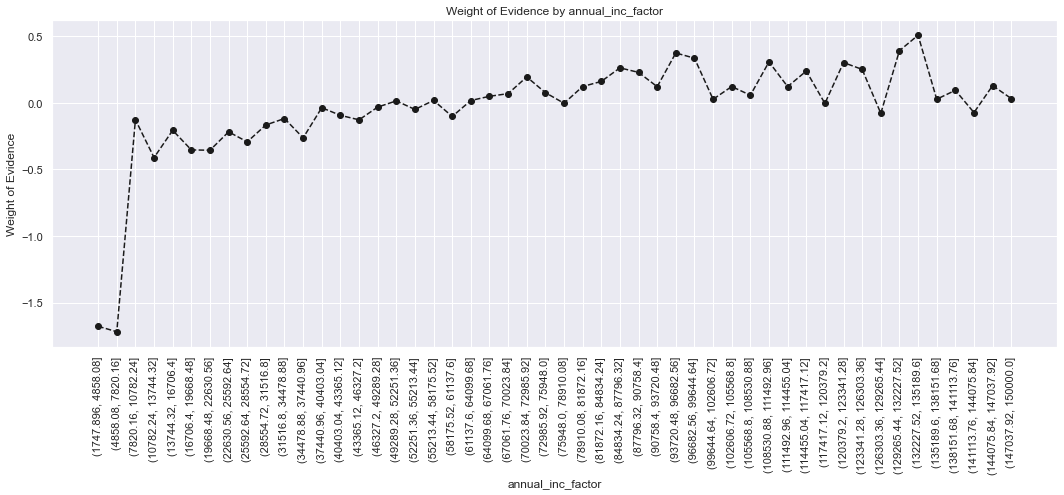

In [126]:
df_temp['annual_inc_factor'] = df_temp['annual_inc_factor'].astype(str)
plot_by_woe(df_temp,90)

We can split the valriable using fine classing with an interval width of $10000. But we observe that the first 5 classes and th bottom 8 classes have very few number of observations. So we conduct coarse classing.

In [127]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000),1,0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <=30000),1,0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <=40000),1,0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <=50000),1,0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <=60000),1,0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <=70000),1,0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <=80000),1,0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <=90000),1,0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <=100000),1,0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <=120000),1,0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <=140000),1,0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000),1,0)


In [128]:
# Exploring months since last delinquency
sum(df_inputs_prepr['mths_since_last_delinq'].isnull())/len(df_inputs_prepr['mths_since_last_delinq'])*100

53.690554060285024

As seen before, there are a lot of missing values for this categorical variable. So we create a Missing Dummy variable. Then we can conduct fine classing or coarse classing of all the non-missing variables.

In [129]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.188, 3.76]",6625,0.958340,0.030681,6349.0,276.0,0.030023,0.061828,-0.722386,NaN,NaN,inf
1,"(3.76, 7.52]",13834,0.976290,0.064066,13506.0,328.0,0.063867,0.073477,-0.140162,0.017951,0.582224,inf
2,"(7.52, 11.28]",16690,0.977951,0.077292,16322.0,368.0,0.077184,0.082437,-0.065852,0.001661,0.074311,inf
3,"(11.28, 15.04]",16547,0.978183,0.076630,16186.0,361.0,0.076540,0.080869,-0.055014,0.000232,0.010838,inf
4,"(15.04, 18.8]",11645,0.979648,0.053929,11408.0,237.0,0.053946,0.053091,0.015972,0.001465,0.070986,inf
5,"(18.8, 22.56]",14579,0.978531,0.067516,14266.0,313.0,0.067461,0.070116,-0.038607,0.001117,0.054579,inf
6,"(22.56, 26.32]",13603,0.982283,0.062996,13362.0,241.0,0.063186,0.053987,0.157335,0.003753,0.195942,inf
7,"(26.32, 30.08]",13221,0.981393,0.061227,12975.0,246.0,0.061356,0.055108,0.107410,0.000890,0.049925,inf
8,"(30.08, 33.84]",9442,0.981042,0.043726,9263.0,179.0,0.043803,0.040099,0.088360,0.000351,0.019051,inf
9,"(33.84, 37.6]",12168,0.980358,0.056351,11929.0,239.0,0.056410,0.053539,0.052226,0.000684,0.036133,inf


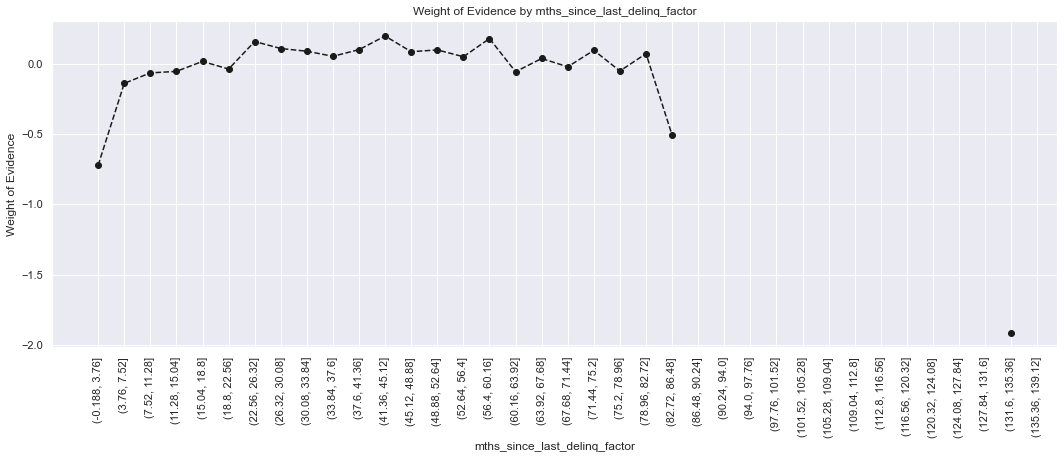

In [130]:
df_temp['mths_since_last_delinq_factor'] = df_temp['mths_since_last_delinq_factor'].astype(str)
plot_by_woe(df_temp,90)

In [131]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-7'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=0) & (df_inputs_prepr['mths_since_last_delinq']<7),1,0)
df_inputs_prepr['mths_since_last_delinq:7-18'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=7) & (df_inputs_prepr['mths_since_last_delinq']<18),1,0)
df_inputs_prepr['mths_since_last_delinq:18-36'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=18) & (df_inputs_prepr['mths_since_last_delinq']<36),1,0)
df_inputs_prepr['mths_since_last_delinq:36-54'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=36) & (df_inputs_prepr['mths_since_last_delinq']<54),1,0)
df_inputs_prepr['mths_since_last_delinq:54-82'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=54) & (df_inputs_prepr['mths_since_last_delinq']<82),1,0)
df_inputs_prepr['mths_since_last_delinq:>=82'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=82),1,0)

In [132]:
# Exploring dti
len(df_inputs_prepr['dti'].unique())

3997

In [133]:
# Fine classing dti
df_inputs_prepr_temp['dti'] = pd.cut((df_inputs_prepr['dti']),50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti', df_targets_prepr)
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dti,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.04, 0.8]",753,0.973440,0.003487,733.0,20.0,0.003466,0.004480,-0.256624,NaN,NaN,0.03576
1,"(0.8, 1.6]",1025,0.985366,0.004747,1010.0,15.0,0.004776,0.003360,0.351617,0.011926,0.608242,0.03576
2,"(1.6, 2.399]",1393,0.983489,0.006451,1370.0,23.0,0.006478,0.005152,0.229034,0.001877,0.122584,0.03576
3,"(2.399, 3.199]",1898,0.982086,0.008790,1864.0,34.0,0.008814,0.007616,0.146082,0.001402,0.082952,0.03576
4,"(3.199, 3.999]",2454,0.985330,0.011365,2418.0,36.0,0.011434,0.008065,0.349139,0.003244,0.203058,0.03576
5,"(3.999, 4.799]",2929,0.985319,0.013564,2886.0,43.0,0.013647,0.009633,0.348389,0.000011,0.000750,0.03576
6,"(4.799, 5.599]",3489,0.984236,0.016158,3434.0,55.0,0.016239,0.012321,0.276110,0.001083,0.072279,0.03576
7,"(5.599, 6.398]",4016,0.979831,0.018598,3935.0,81.0,0.018608,0.018145,0.025179,0.004405,0.250931,0.03576
8,"(6.398, 7.198]",4589,0.982349,0.021252,4508.0,81.0,0.021317,0.018145,0.161122,0.002518,0.135943,0.03576
9,"(7.198, 7.998]",5280,0.983712,0.024452,5194.0,86.0,0.024561,0.019265,0.242874,0.001363,0.081752,0.03576


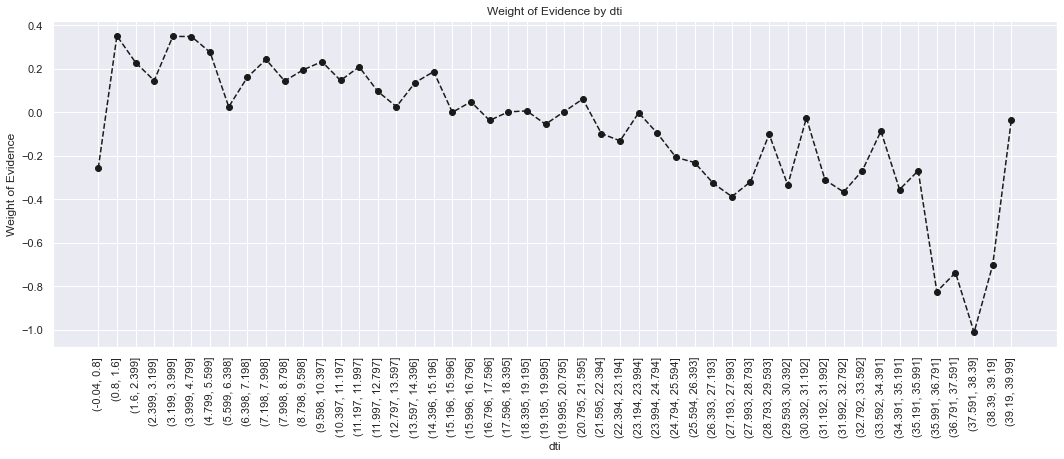

In [134]:
df_temp['dti'] = df_temp['dti'].astype(str)
plot_by_woe(df_temp, 90)

In [135]:
# Coarse Classing
df_inputs_prepr['dti:<12'] = np.where((df_inputs_prepr['dti'] < 12),1,0)
df_inputs_prepr['dti:12-18'] = np.where((df_inputs_prepr['dti']>=12) & (df_inputs_prepr['dti']<18),1,0)
df_inputs_prepr['dti:18-22'] = np.where((df_inputs_prepr['dti']>=18) & (df_inputs_prepr['dti']<22),1,0)
df_inputs_prepr['dti:22-30'] = np.where((df_inputs_prepr['dti']>=22) & (df_inputs_prepr['dti']<30),1,0)
df_inputs_prepr['dti:>30'] = np.where((df_inputs_prepr['dti']>=30),1,0)

In [136]:
# Exploring mths_since_last_record
df_inputs_prepr['mths_since_last_record'].unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.,  24.,  15.,  84.,  10.,  16.,   8.,   9.,   3., 121.,
         4.,   1.,   2.])

In [137]:
len(df_inputs_prepr['mths_since_last_record'].unique())

124

In [138]:
sum(df_inputs_prepr['mths_since_last_record'].isnull())/len(df_inputs_prepr['mths_since_last_record'])*100

86.56658481400859

We see that there are 86% missing values in this variable. Hence we create a missing dummy variable. Let us check the non-missing values.

In [139]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.129, 2.58]",1330,0.847368,0.021233,1127.0,203.0,0.018444,0.132420,-1.971259,NaN,NaN,inf
1,"(2.58, 5.16]",156,0.961538,0.002491,150.0,6.0,0.002455,0.003914,-0.466491,0.114170,1.504767,inf
2,"(5.16, 7.74]",158,0.974684,0.002522,154.0,4.0,0.002520,0.002609,-0.034709,0.013145,0.431782,inf
3,"(7.74, 10.32]",306,0.980392,0.004885,300.0,6.0,0.004910,0.003914,0.226656,0.005709,0.261365,inf
4,"(10.32, 12.9]",250,0.968000,0.003991,242.0,8.0,0.003960,0.005219,-0.275871,0.012392,0.502527,inf
5,"(12.9, 15.48]",387,0.979328,0.006178,379.0,8.0,0.006202,0.005219,0.172728,0.011328,0.448598,inf
6,"(15.48, 18.06]",419,0.978520,0.006689,410.0,9.0,0.006710,0.005871,0.133565,0.000808,0.039162,inf
7,"(18.06, 20.64]",308,0.990260,0.004917,305.0,3.0,0.004991,0.001957,0.936332,0.011739,0.802767,inf
8,"(20.64, 23.22]",552,0.981884,0.008813,542.0,10.0,0.008870,0.006523,0.307314,0.008376,0.629019,inf
9,"(23.22, 25.8]",400,0.975000,0.006386,390.0,10.0,0.006382,0.006523,-0.021805,0.006884,0.329119,inf


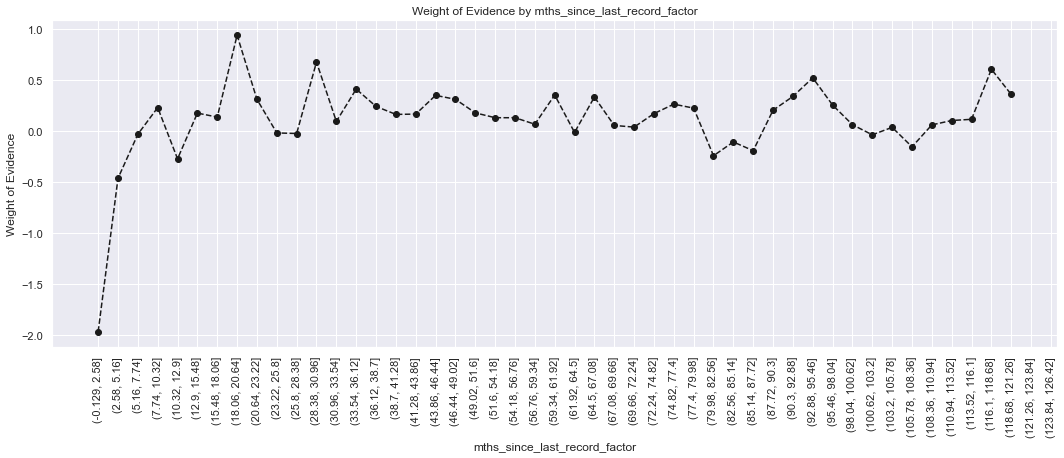

In [140]:
df_temp['mths_since_last_record_factor'] = df_temp['mths_since_last_record_factor'].astype(str)
plot_by_woe(df_temp,90)

In [144]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-15'] = np.where((df_inputs_prepr['mths_since_last_record'] >=0) & (df_inputs_prepr['mths_since_last_delinq']<15),1,0)
df_inputs_prepr['mths_since_last_record:15-38'] = np.where((df_inputs_prepr['mths_since_last_record'] >=15) & (df_inputs_prepr['mths_since_last_delinq']<38),1,0)
df_inputs_prepr['mths_since_last_record:38-72'] = np.where((df_inputs_prepr['mths_since_last_record'] >=38) & (df_inputs_prepr['mths_since_last_delinq']<72),1,0)
df_inputs_prepr['mths_since_last_record:>=72'] = np.where((df_inputs_prepr['mths_since_last_record']>=72),1,0)

In [146]:
loan_data_df = df_inputs_prepr.copy()

We will build LGD and EAD models on only the defaults for which a certain window for part payment has elapsed. In our data 'Charged Off' and 'Does not meed credit policy.Status:Charged Off' are such cases. Hence we will only consider these classes as default for our LGD and EAD model. 

In [147]:
loan_data_defaults = loan_data_df[loan_data_df['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]

In [148]:
loan_data_defaults.shape

(43236, 297)

In [149]:
pd.options.display.max_rows = None

In [150]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                     

The variables with missing values which we used as independent variables in the PD model are mths_since_last_delinq, mths_since_last_record and emp_length.

In [151]:
# Filling the Missing values with 0 as per risk conservative approach
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)
loan_data_defaults['emp_length'].fillna(0, inplace = True)

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Dependent Variable

We assume that the 'funded_amnt' variable reflects the amount lost when a borrower defaulted.

In [152]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

We see that the maximum recovery rate it 1.22. This usually happens due to accounting calculations and database errors. We will truncate this to 1 as the recovery rate ranges from 0 to 1.

In [154]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [156]:
# Calculating credit conversion factor for EAD
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [157]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [158]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

### Exploring Dependent Variables

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

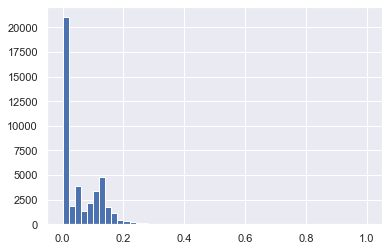

In [159]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

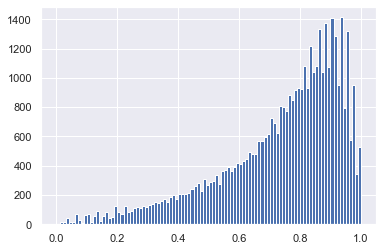

In [160]:
plt.hist(loan_data_defaults['CCF'], bins = 100)

The best method to calculate LGD and EAD is beta regression. However, due to the limitations of Python and memory, we will use a combination of Logistic and Linear Regression.

For LGD: First we will use logistic regression to see if the recovery rate is equal to 0 or greater than 0. If its more than 0, then we will use linear regression to estimate the recovery rate.

For EAD: Since the CCF is more homogeneously distributed, we will estimate the CCF using Linear Regression.

In [161]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
21        0
24        1
26        0
27        1
46        1
50        1
53        1
55        0
64        1
66        1
68        1
71        1
97        1
100       1
105       1
114       1
120       1
121       1
124       1
131       0
137       1
145       1
151       1
153       0
155       0
168       1
175       1
176       1
177       1
179       0
182       1
183       1
188       1
195       1
203       1
204       0
212       1
220       0
224       1
225       1
226       1
231       1
251       1
255       1
266       1
270       1
273       1
278       0
299       1
300       1
301       1
304       1
313       0
314       1
317       1
324       0
328       1
339       1
340       1
344       0
348       1
356       0
362       1
365       1
376       1
380       1
381       1
388       1
412       1
414       0
422       1
424       1
430       1
433       1
435       1
458       1
462       1
464       1
466 

## LGD Model

In [163]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
lgd_inputs_stage1_train, lgd_inputs_stage1_test, lgd_targets_stage1_train, lgd_targets_stage1_test = train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

### Preprating the inputs

In [164]:
features = ['home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'addr_state:AK_DC_KS_WY_ID_ME',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'addr_state:TN_HI_NV',
'addr_state:AZ_RI_NY',
'addr_state:VA_LA',
'addr_state:MD_AL_IN_MO',
'addr_state:MA_AR',
'addr_state:MI_DE_WI',
'addr_state:NC_NM',
'addr_state:CO_MN_NH_KY_VT',
'addr_state:SC_WV_UT',
'purpose:house_moving',
'purpose:other_medical',
'purpose:vacation_major_purchase',
'purpose:wedding_renewable_energy',
'sub_grade:G5_G3_G4',
'sub_grade:G1_G2_F3_F5',
'sub_grade:E2_E4_F4_E5_F1_F2',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4',
'emp_length:5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'months_issue_d_date:<49',
'months_issue_d_date:49-54',
'months_issue_d_date:55-61',
'months_issue_d_date:62-77',
'months_issue_d_date:>77',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<153',
'months_since_earliest_cr_line:154-258',
'months_since_earliest_cr_line:<258-387',
'months_since_earliest_cr_line:<387',
'delinq_2yrs:<5',
'delinq_2yrs:5-10',
'delinq_2yrs:>10',
'inq_last_6mths:<4',
'inq_last_6mths:4-6',
'inq_last_6mths:>6',
'acc_now_delinq:<1',
'acc_now_delinq:>1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-7',
'mths_since_last_delinq:7-18',
'mths_since_last_delinq:18-36',
'mths_since_last_delinq:36-54',
'mths_since_last_delinq:54-82',
'mths_since_last_delinq:>=82',
'dti:<12',
'dti:12-18',
'dti:18-22',
'dti:22-30',
'dti:>30',
'mths_since_last_record:Missing',
'mths_since_last_record:0-15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-72',
'mths_since_last_record:>=72']

In [165]:
features_ref_cat = ['home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:SC_WV_UT',
'purpose:wedding_renewable_energy',
'sub_grade:G5_G3_G4',
'term:36',
'emp_length:0',
'months_issue_d_date:<49',
'int_rate:<9.548',
'months_since_earliest_cr_line:<153',
'delinq_2yrs:<5',
'inq_last_6mths:<4',
'acc_now_delinq:<1',
'annual_inc:<20K',
'mths_since_last_delinq:Missing',
'dti:<12',
'mths_since_last_record:Missing']

In [166]:
lgd_inputs_stage1_train = lgd_inputs_stage1_train[features]
lgd_inputs_stage1_train = lgd_inputs_stage1_train.drop(features_ref_cat, axis = 1)

### Estimating the Model

In [167]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        
    def fit(self, X, y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [168]:
reg_lgd_stage1 = LogisticRegression_with_p_values()
reg_lgd_stage1.fit(lgd_inputs_stage1_train, lgd_targets_stage1_train)

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [169]:
feature_name = lgd_inputs_stage1_train.columns.values

In [170]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg_lgd_stage1.coef_)
# Adding the coefficients to the first row
# Shifting rows by 1 place down
summary_table.index = summary_table.index + 1
# Filling the first row with the intercept
summary_table.loc[0] = ['Intercept', reg_lgd_stage1.intercept_[0]]
# Sorting by index
summary_table = summary_table.sort_index()
p_values = reg_lgd_stage1.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficents,p_values
0,Intercept,-0.492619,NaN
1,home_ownership:MORTGAGE,-0.037522,1.378655e-01
2,addr_state:AK_DC_KS_WY_ID_ME,0.050068,6.179927e-01
3,addr_state:SD_OK_MS_MT_NE_IA_ND,-0.032017,7.332686e-01
4,addr_state:TN_HI_NV,0.008276,8.944875e-01
5,addr_state:AZ_RI_NY,-0.281800,2.353684e-14
6,addr_state:VA_LA,0.053326,3.592523e-01
7,addr_state:MD_AL_IN_MO,-0.070624,1.246083e-01
8,addr_state:MA_AR,0.158337,2.015662e-02
9,addr_state:MI_DE_WI,-0.100961,9.275874e-02


### Testing the Model

In [171]:
lgd_inputs_stage1_test = lgd_inputs_stage1_test[features]
lgd_inputs_stage1_test = lgd_inputs_stage1_test.drop(features_ref_cat, axis = 1)

In [172]:
y_hat_test_lgd_stage1 = reg_lgd_stage1.model.predict(lgd_inputs_stage1_test)

In [173]:
y_hat_test_lgd_stage1

array([1, 0, 0, ..., 1, 1, 0])

In [174]:
y_hat_test_proba_lgd_stage1 = reg_lgd_stage1.model.predict_proba(lgd_inputs_stage1_test)

In [175]:
y_hat_test_proba_lgd_stage1

array([[0.3530513 , 0.6469487 ],
       [0.50787033, 0.49212967],
       [0.54077147, 0.45922853],
       ...,
       [0.44734941, 0.55265059],
       [0.16584443, 0.83415557],
       [0.63088144, 0.36911856]])

In [176]:
# Keeping only probability greater than 0
y_hat_test_proba_lgd_stage1 = y_hat_test_proba_lgd_stage1[:][:,1]

In [177]:
y_hat_test_proba_lgd_stage1

array([0.6469487 , 0.49212967, 0.45922853, ..., 0.55265059, 0.83415557,
       0.36911856])

In [178]:
# Mapping to a temp variable
lgd_targets_stage1_test_temp = lgd_targets_stage1_test

In [179]:
# Resetting Index
lgd_targets_stage1_test_temp.reset_index(drop = True, inplace = True)

In [180]:
# Concatinating test data target and predictions
df_actual_predicted_probs = pd.concat([lgd_targets_stage1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage1)], axis = 1)

In [181]:
# Renaming the columns
df_actual_predicted_probs.columns = ['lgd_targets_stage1_test', 'y_hat_proba_lgd_stage1']

In [182]:
# Verifying the index
df_actual_predicted_probs.index = lgd_inputs_stage1_test.index

In [183]:
df_actual_predicted_probs.head()

,lgd_targets_stage1_test,y_hat_proba_lgd_stage1
178928,1,0.646949
69814,1,0.492130
101396,0,0.459229
463268,1,0.268253
253729,0,0.385569


### Estimating the Accuracy

In [184]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage1'] = np.where(df_actual_predicted_probs['y_hat_proba_lgd_stage1'] > tr,1,0)

In [185]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'],df_actual_predicted_probs['y_hat_test_lgd_stage1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2072,1690
1,1305,3581


In [186]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.239593,0.195421
1,0.150902,0.414084


In [187]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.653677150786309

We get a model accuracy of 65.37%. Let us check the AUROC score.

In [188]:
from sklearn.metrics import roc_curve, roc_auc_score

In [189]:
roc_curve(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'])

(array([0.        , 0.44922913, 1.        ]),
 array([0.        , 0.73291036, 1.        ]),
 array([2, 1, 0]))

In [190]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage1_test'],
                              df_actual_predicted_probs['y_hat_test_lgd_stage1'])

Text(0.5, 1.0, 'ROC curve')

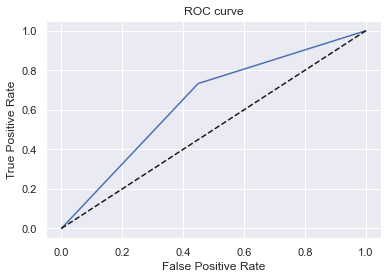

In [191]:
# ROC 
plt.plot(fpr,tpr)
# Benchmark (predicting by chance)
plt.plot(fpr,fpr,linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [192]:
# Calculating the AUROC
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'])
AUROC

0.6418406113399326

Since we are using these results for linear regression, it is more important to have a large proportion of correctly classified values that are greater than 0, than to have correctly classified 0's. This is because during the 2nd stage some of the values, classified as >1 may be estimated to be 0, thus correcting the current misclassification.

### Saving the Model

In [193]:
import pickle

In [194]:
pickle.dump(reg_lgd_stage1, open('reg_lgd_stage1.sav', 'wb'))

## Stage 2 - Multiple Linear Regression

In [195]:
lgd_stage2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [196]:
# Splitting the data into train and test
lgd_inputs_stage2_train, lgd_inputs_stage2_test, lgd_targets_stage2_train, lgd_targets_stage2_test = train_test_split(lgd_stage2_data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [197]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

In [198]:
# Creating function for linear regression with P-values
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis = 0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [199]:
lgd_inputs_stage2_train = lgd_inputs_stage2_train[features]
lgd_inputs_stage2_train = lgd_inputs_stage2_train.drop(features_ref_cat, axis = 1)

In [200]:
reg_lgd_stage2 = LinearRegression()
reg_lgd_stage2.fit(lgd_inputs_stage2_train, lgd_targets_stage2_train)

LinearRegression()

In [201]:
feature_name = lgd_inputs_stage2_train.columns.values

In [202]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg_lgd_stage2.coef_)
# Adding the coefficients to the first row
# Shifting rows by 1 place down
summary_table.index = summary_table.index + 1
# Filling the first row with the intercept
summary_table.loc[0] = ['Intercept', reg_lgd_stage2.intercept_]
# Sorting by index
summary_table = summary_table.sort_index()
p_values = reg_lgd_stage2.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficents,p_values
0,Intercept,0.139008,NaN
1,home_ownership:MORTGAGE,0.000628,6.592858e-01
2,addr_state:AK_DC_KS_WY_ID_ME,0.000334,9.514729e-01
3,addr_state:SD_OK_MS_MT_NE_IA_ND,0.005095,3.407358e-01
4,addr_state:TN_HI_NV,0.007622,3.302900e-02
5,addr_state:AZ_RI_NY,-0.001187,5.800428e-01
6,addr_state:VA_LA,0.007805,1.298889e-02
7,addr_state:MD_AL_IN_MO,0.009018,6.535353e-04
8,addr_state:MA_AR,-0.000069,9.851975e-01
9,addr_state:MI_DE_WI,0.003913,2.617081e-01


##### Interpretation:

If a borrower has annual income between 100K and 120K, then the recovery rate will be 0.002873 times lower.

If a borrower takes a loan for a house_moving, then the recovery rate will be 0.005005 times higher.

### Model Evaluation

In [203]:
lgd_inputs_stage2_test = lgd_inputs_stage2_test[features]
lgd_inputs_stage2_test = lgd_inputs_stage2_test.drop(features_ref_cat, axis = 1)

In [204]:
y_hat_test_lgd_stage2 = reg_lgd_stage2.predict(lgd_inputs_stage2_test)

In [205]:
lgd_targets_stage2_temp = lgd_targets_stage2_test

In [206]:
lgd_targets_stage2_temp = lgd_targets_stage2_temp.reset_index(drop = True)

In [207]:
# Calculating correlation maxtrix between actual and predicted values to check how well the model predicts actual values
pd.concat([lgd_targets_stage2_temp, pd.DataFrame(y_hat_test_lgd_stage2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.338395
0,0.338395,1.000000


<AxesSubplot:xlabel='recovery_rate'>

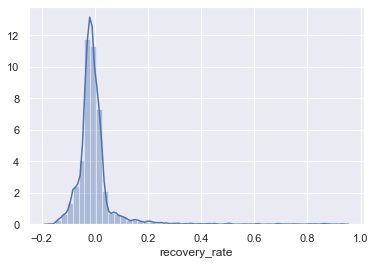

In [208]:
# Let us check the residuals distribution
sns.distplot(lgd_targets_stage2_test - y_hat_test_lgd_stage2)

We observe a normal distribution and most of the residuals are symmetrically distributed around 0. So this seems to be a good model.

In [209]:
pickle.dump(reg_lgd_stage2, open('lgd_model_stage2.sav', 'wb'))

### Combining Stage 1 and Stage 2

In [210]:
# Let us use the stage2 reg model to predict the observations in the test data of stage 1.
y_hat_test_lgd_stage2_all = reg_lgd_stage2.predict(lgd_inputs_stage1_test)

In [211]:
y_hat_test_lgd_stage2_all

array([0.10742278, 0.10995636, 0.13279023, ..., 0.09587957, 0.08712483,
       0.16551611])

Every observation classified as 0 by the stage 1 logistic regression model has estimated recovery rate of 0. Similarly, every observation classified as 1 by stage 1 logistic regression model has estimated recovery rate as per the stage 2 linear regression model.

Also, whenever there is a 0 predicted by the first model, all values predicted by the second model when multiplied by it will remain 0. For a prediction equal to 1 by the first model, all values predicted by the second model when multiplied by 1 will remain the same.

In [212]:
y_hat_test_lgd = y_hat_test_lgd_stage1 * y_hat_test_lgd_stage2_all

In [213]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.059313
std,0.052227
min,0.000000
25%,0.000000
50%,0.070105
75%,0.100151
max,0.198262


## EAD Model

### Estimation & Interpretation

In [214]:
# Splitting the dataset
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1),
                                                                                                                   loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [215]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [216]:
ead_inputs_train = ead_inputs_train[features]

In [217]:
ead_inputs_train = ead_inputs_train.drop(features_ref_cat, axis = 1)

In [218]:
ead_inputs_train.shape

(34588, 68)

In [219]:
ead_inputs_train.head()

,home_ownership:MORTGAGE,addr_state:AK_DC_KS_WY_ID_ME,addr_state:SD_OK_MS_MT_NE_IA_ND,addr_state:TN_HI_NV,addr_state:AZ_RI_NY,addr_state:VA_LA,addr_state:MD_AL_IN_MO,addr_state:MA_AR,addr_state:MI_DE_WI,addr_state:NC_NM,addr_state:CO_MN_NH_KY_VT,purpose:house_moving,purpose:other_medical,purpose:vacation_major_purchase,sub_grade:G1_G2_F3_F5,sub_grade:E2_E4_F4_E5_F1_F2,term:60,emp_length:1,emp_length:2,emp_length:3,emp_length:4,emp_length:5,emp_length:6,emp_length:7,emp_length:8,emp_length:9,emp_length:10,months_issue_d_date:49-54,months_issue_d_date:55-61,months_issue_d_date:62-77,months_issue_d_date:>77,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:154-258,months_since_earliest_cr_line:<258-387,months_since_earliest_cr_line:<387,delinq_2yrs:5-10,delinq_2yrs:>10,inq_last_6mths:4-6,inq_last_6mths:>6,acc_now_delinq:>1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:0-7,mths_since_last_delinq:7-18,mths_since_last_delinq:18-36,mths_since_last_delinq:36-54,mths_since_last_delinq:54-82,mths_since_last_delinq:>=82,dti:12-18,dti:18-22,dti:22-30,dti:>30,mths_since_last_record:0-15,mths_since_last_record:15-38,mths_since_last_record:38-72,mths_since_last_record:>=72
165859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
213563,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
182682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
81769,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
74862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [220]:
# Using the LinearRegression function
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [221]:
feature_name = ead_inputs_train.columns.values

In [222]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg_ead.coef_)
# Adding the coefficients to the first row
# Shifting rows by 1 place down
summary_table.index = summary_table.index + 1
# Filling the first row with the intercept
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Sorting by index
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficents,p_values
0,Intercept,0.774938,NaN
1,home_ownership:MORTGAGE,-0.002387,2.331383e-01
2,addr_state:AK_DC_KS_WY_ID_ME,-0.024341,2.182365e-03
3,addr_state:SD_OK_MS_MT_NE_IA_ND,0.001566,8.342654e-01
4,addr_state:TN_HI_NV,0.006856,1.690535e-01
5,addr_state:AZ_RI_NY,-0.004724,1.072636e-01
6,addr_state:VA_LA,-0.020877,5.275214e-06
7,addr_state:MD_AL_IN_MO,-0.005618,1.244653e-01
8,addr_state:MA_AR,-0.007453,1.608569e-01
9,addr_state:MI_DE_WI,-0.002155,6.524874e-01


Here positive coefficients indicate an increase in the CCF (higher risk), and negative coefficients indicate a decrease in the CCF (lower risk).

For example if the purpose of the loan is vacation_major_purchase, then the CCF is 0.012200 times higher than the CCF of purpose:wedding_renewable_energy (reference category).

### Model Evaluation

In [223]:
ead_inputs_test = ead_inputs_test[features]

In [224]:
ead_inputs_test = ead_inputs_test.drop(features_ref_cat, axis = 1)

In [225]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [226]:
ead_targets_test_temp = ead_targets_test
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

## Expected Loss

In [227]:
# Importing preprocessed complete data
loan_data_inputs_train = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_inputs_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_inputs_test.csv', index_col = 0)

# Concatenating the dataframes
loan_data_preprocessed = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)

In [228]:
loan_data_preprocessed.shape

(466285, 297)

#### Calculating LGD

In [229]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features]

In [230]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_ref_cat, axis = 1)

In [231]:
# Adding prediction of stage 1 model
loan_data_preprocessed['recovery_rate_stage1'] = reg_lgd_stage1.model.predict(loan_data_preprocessed_lgd_ead)


In [232]:
# Adding prediction of stage 2 model
loan_data_preprocessed['recovery_rate_stage2'] = reg_lgd_stage2.predict(loan_data_preprocessed_lgd_ead)

In [233]:
# Combining the two columns
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_stage1'] * loan_data_preprocessed['recovery_rate_stage2']

In [234]:
# Truncating all values outside the range of 0 and 1.
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [235]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [236]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.959141
std           0.051799
min           0.801738
25%           0.914098
50%           1.000000
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

#### Calculating EAD

In [237]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [238]:
# Truncating all values outside the range of 0 and 1.
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [239]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_inputs_train['funded_amnt']

In [240]:
loan_data_preprocessed.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_issue_d_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:AK_DC_KS_WY_ID_ME,addr_state:SD_OK_MS_MT_NE_IA_ND,addr_state:TN_HI_NV,addr_state:AZ_RI_NY,addr_state:VA_LA,addr_state:MD_AL_IN_MO,addr_state:MA_AR,addr_state:MI_DE_WI,addr_state:NC_NM,addr_state:CO_MN_NH_KY_VT,addr_state:SC_WV_UT,purpose:house_moving,purpose:other_medical,purpose:vacation_major_purchase,purpose:wedding_renewable_energy,sub_grade:G5_G3_G4,sub_grade:G1_G2_F3_F5,sub_grade:E2_E4_F4_E5_F1_F2,term:36,term:60,emp_length:0,emp_length:1,emp_length:2,emp_length:3,emp_length:4,emp_length:5,emp_length:6,emp_length:7,emp_length:8,emp_length:9,emp_length:10,months_issue_d_date_factor,months_issue_d_date:<49,months_issue_d_date:49-54,months_issue_d_date:55-61,months_issue_d_date:62-77,months_issue_d_date:>77,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int

#### Calculating PD

In [241]:
# Setting the index
loan_data_preprocessed = loan_data_preprocessed.set_index('Unnamed: 0.1')

In [242]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_issue_d_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:AK_DC_KS_WY_ID_ME,addr_state:SD_OK_MS_MT_NE_IA_ND,addr_state:TN_HI_NV,addr_state:AZ_RI_NY,addr_state:VA_LA,addr_state:MD_AL_IN_MO,addr_state:MA_AR,addr_state:MI_DE_WI,addr_state:NC_NM,addr_state:CO_MN_NH_KY_VT,addr_state:SC_WV_UT,purpose:house_moving,purpose:other_medical,purpose:vacation_major_purchase,purpose:wedding_renewable_energy,sub_grade:G5_G3_G4,sub_grade:G1_G2_F3_F5,sub_grade:E2_E4_F4_E5_F1_F2,term:36,term:60,emp_length:0,emp_length:1,emp_length:2,emp_length:3,emp_length:4,emp_length:5,emp_length:6,emp_length:7,emp_length:8,emp_length:9,emp_length:10,months_issue_d_date_factor,months_issue_d_date:<49,months_issue_d_date:49-54,months_issue_d_date:55-61,months_issue_d_date:62-77,months_issue_d_date:>77,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281

In [243]:
loan_data_preprocessed_temp = loan_data_preprocessed[features]

In [244]:
loan_data_preprocessed_temp = loan_data_preprocessed_temp.drop(features_ref_cat, axis = 1)

In [245]:
loan_data_preprocessed_temp.shape

(466285, 68)

In [246]:
import pickle

In [247]:
reg_pd = pickle.load(open('reg_pd.sav', 'rb'))

In [248]:
loan_data_preprocessed['PD'] = reg_pd.model.predict_proba(loan_data_preprocessed_temp)[:][:, 0]

In [249]:
loan_data_preprocessed['PD'].head()

Unnamed: 0.1
282093    0.485559
329078    0.542898
327665    0.198912
329690    0.074912
449005    0.322073
Name: PD, dtype: float64

In [250]:
loan_data_preprocessed['EL'] = loan_data_preprocessed['PD'] * loan_data_preprocessed['LGD'] * loan_data_preprocessed['EAD']

In [251]:
loan_data_preprocessed['EL'].head()

Unnamed: 0.1
282093    2886.553749
329078    4151.197450
327665     580.016723
329690     910.976254
449005    3967.576462
Name: EL, dtype: float64

In [252]:
loan_data_preprocessed['EL'].describe()

count    373028.000000
mean       2157.855962
std        3222.363063
min           0.000908
25%         158.678760
50%         804.212101
75%        2792.494023
max       31157.804348
Name: EL, dtype: float64

In [253]:
# Calculating total expected loss on the portfolio
loan_data_preprocessed['EL'].sum()

804940693.7211208

In [254]:
# Calculating the total portfolio amount
loan_data_preprocessed['funded_amnt'].sum()

6664052450

In [255]:
# Calculating expected loss proportion for the portfolio
loan_data_preprocessed['EL'].sum() / loan_data_preprocessed['funded_amnt'].sum() *100

12.078846914254417